In [1]:
# Importing my packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
sns.set_style("whitegrid")  # Makes plots look cleaner

In [2]:
df = pd.read_csv("C:/Users/w2087133/Documents/Trends in MM 2000-2020/Maternal mortality trends.csv")
df.head()

,ISO Code,Country,UNICEF Programme Region,UNICEF Reporting Region,UNICEF Sub-Reporting Region,2000,2001,2002,2003,2004,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFG,Afghanistan,South Asia,South Asia,South Asia,1372,1311,1263,1201,1166,...,755,741,702,659,629,601,634,660,551,521
1,ALB,Albania,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,15,14,14,13,13,...,10,9,8,8,7,7,7,14,8,7
2,DZA,Algeria,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,123,113,102,101,91,...,80,79,79,77,75,73,97,79,64,62
3,AND,Andorra,Industrialized,Europe and Central Asia,Western Europe,14,14,14,13,12,...,10,10,10,11,11,11,48,18,17,11
4,AGO,Angola,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,659,629,602,538,499,...,262,249,236,220,208,202,195,211,185,183


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ISO Code                     195 non-null    object
 1   Country                      195 non-null    object
 2   UNICEF Programme Region      195 non-null    object
 3   UNICEF Reporting Region      195 non-null    object
 4   UNICEF Sub-Reporting Region  195 non-null    object
 5   2000                         195 non-null    int64 
 6   2001                         195 non-null    int64 
 7   2002                         195 non-null    int64 
 8   2003                         195 non-null    int64 
 9   2004                         195 non-null    int64 
 10  2005                         195 non-null    int64 
 11  2006                         195 non-null    int64 
 12  2007                         195 non-null    int64 
 13  2008                         195 no

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,235.507692,226.123077,217.666667,208.676923,201.984615,197.620513,194.287179,193.046154,192.805128,191.230769,...,161.384615,155.738462,149.451282,144.800000,135.989744,134.620513,135.338462,151.758974,125.046154,116.630769
std,332.209634,319.847556,310.018268,295.181725,284.943827,277.334012,270.765333,269.212316,271.408360,273.915110,...,236.909006,234.258775,231.132580,228.895614,198.882989,211.694707,195.060388,192.309293,172.094834,165.044846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,18.500000,17.500000,15.500000,15.500000,15.000000,14.000000,13.000000,13.000000,12.500000,...,13.000000,13.000000,12.500000,12.000000,12.000000,12.000000,17.500000,20.000000,14.500000,11.000000
50%,71.000000,68.000000,66.000000,67.000000,63.000000,60.000000,58.000000,57.000000,56.000000,56.000000,...,53.000000,52.000000,51.000000,47.000000,49.000000,48.000000,56.000000,77.000000,53.000000,47.000000
75%,368.500000,355.000000,330.500000,331.500000,313.500000,312.000000,292.000000,290.000000,281.000000,267.500000,...,212.000000,203.000000,192.000000,181.500000,172.000000,169.000000,178.000000,204.000000,159.500000,155.000000
max,1658.000000,1580.000000,1521.000000,1487.000000,1450.000000,1389.000000,1337.000000,1271.000000,1264.000000,1387.000000,...,1216.000000,1436.000000,1629.000000,1662.000000,1118.000000,1650.000000,1296.000000,1127.000000,1016.000000,993.000000


In [4]:
df.shape

(195, 29)

In [5]:
#. describe() already shows that I've got non-null valuesso I'll stop checking, no need for df.isna().sum()
df.columns

Index(['ISO Code', 'Country', 'UNICEF Programme Region',
       'UNICEF Reporting Region', 'UNICEF Sub-Reporting Region', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [6]:
df = df.rename(columns ={
    "UNICEF Programme Region": "UPR",
    "UNICEF Reporting Region": "URR",
    "UNICEF Sub-Reporting Region": "USRR"
})

#renaming (columns{old:new}), reinforcing dictionary use in Python.

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia'

In [8]:
df['Country']= df['Country'].str.strip()

In [9]:
df['Country'] = df['Country'].replace({
    "Bolivia (Plurinational State of)": "Bolivia",
    "Côte d'Ivoire": "Cote d'Ivoire",
    "Democratic People's Republic of Korea": "North Korea",
    "Democratic Republic of the Congo": "DR Congo",
    "Iran (Islamic Republic of)": "Iran",
    "Lao People's Democratic Republic": "Laos",
    "Russian Federation": "Russia",
    "Micronesia (Federated States of)": "Micronesia",
    "Netherlands (Kingdom of the)": "Netherlands",
    "Republic of Korea": "South Korea",
    "State of Palestine": "Palestine",
    "Syrian Arab Republic": "Syria",
    "United Republic of Tanzania": "Tanzania",
    "The Republic of Türkiye": "Turkey",
    "Venezuela (Bolivarian Republic of)": "Venezuela",
    "Viet Nam": "Vietnam"
})

In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'North Korea', 'DR Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau',

In [11]:
df['UPR'].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Industrialized',
       'Eastern and Southern Africa', 'Latin America and the Caribbean',
       'West and Central Africa', 'East Asia and the Pacific',
       'Not Classified'], dtype=object)

In [12]:
df['URR'].unique()

array(['South Asia', 'Europe and Central Asia',
       'Middle East and North Africa', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and Pacific',
       'North America', 'Not Classified'], dtype=object)

In [13]:
df['URR'].value_counts()

URR
Europe and Central Asia         52
Sub-Saharan Africa              49
Latin America and Caribbean     33
East Asia and Pacific           31
Middle East and North Africa    19
South Asia                       8
North America                    2
Not Classified                   1
Name: count, dtype: int64

In [14]:
df['UPR'].value_counts()

UPR
Industrialized                     37
Latin America and the Caribbean    33
East Asia and the Pacific          28
West and Central Africa            24
Eastern and Southern Africa        23
Europe and Central Asia            21
Middle East and North Africa       20
South Asia                          8
Not Classified                      1
Name: count, dtype: int64

In [15]:
#melt the dataset: convert year columns into a single year column 
df_long = df.melt(
    id_vars = ['ISO Code', 'Country', 'UPR', 'URR', 'USRR'],
    var_name = 'Year',
    value_name = 'MMR'
)

#convert 'year' to numeric
df_long['Year'] = df_long['Year'].astype(int)
df_long.head()

,ISO Code,Country,UPR,URR,USRR,Year,MMR
0,AFG,Afghanistan,South Asia,South Asia,South Asia,2000,1372
1,ALB,Albania,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,2000,15
2,DZA,Algeria,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,2000,123
3,AND,Andorra,Industrialized,Europe and Central Asia,Western Europe,2000,14
4,AGO,Angola,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2000,659


In [16]:
df_long.tail()

,ISO Code,Country,UPR,URR,USRR,Year,MMR
4675,VEN,Venezuela,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2023,227
4676,VNM,Vietnam,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,48
4677,YEM,Yemen,Middle East and North Africa,Middle East and North Africa,Middle East and North Africa,2023,118
4678,ZMB,Zambia,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2023,85
4679,ZWE,Zimbabwe,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2023,358


In [17]:
#Average maternal mortality ratio by region using URR
regional_avg = df_long.groupby('URR')['MMR'].mean().sort_values(ascending = False)
regional_avg

URR
Sub-Saharan Africa              479.941327
South Asia                      260.817708
East Asia and Pacific           122.973118
Latin America and Caribbean      86.316919
Middle East and North Africa     45.655702
Not Classified                   20.000000
North America                    13.958333
Europe and Central Asia          13.806891
Name: MMR, dtype: float64

In [18]:
#Average maternal mortality ratio by region and year
regional_trends = df_long.groupby(['URR', 'Year'])['MMR'].mean().reset_index()
regional_trends

,URR,Year,MMR
0,East Asia and Pacific,2000,173.193548
1,East Asia and Pacific,2001,167.451613
2,East Asia and Pacific,2002,163.225806
3,East Asia and Pacific,2003,156.096774
4,East Asia and Pacific,2004,152.838710
...,...,...,...
187,Sub-Saharan Africa,2019,375.571429
188,Sub-Saharan Africa,2020,359.326531
189,Sub-Saharan Africa,2021,378.959184
190,Sub-Saharan Africa,2022,328.959184


In [19]:
#Average maternal mortality ratio by region and year
regional_trends = df_long.groupby(['URR', 'Year'])['MMR'].mean().reset_index()
regional_trends.head()

,URR,Year,MMR
0,East Asia and Pacific,2000,173.193548
1,East Asia and Pacific,2001,167.451613
2,East Asia and Pacific,2002,163.225806
3,East Asia and Pacific,2003,156.096774
4,East Asia and Pacific,2004,152.838710


In [20]:
#Average MMR by URR in 2000

urr_2000 = df_long[df_long['Year']==2000].groupby('URR')['MMR'].mean().sort_values(ascending = False)
urr_2000

URR
Sub-Saharan Africa              633.448980
South Asia                      451.625000
East Asia and Pacific           173.193548
Latin America and Caribbean     107.545455
Middle East and North Africa     67.473684
Not Classified                   22.000000
Europe and Central Asia          19.788462
North America                    10.500000
Name: MMR, dtype: float64

In [21]:
#Average MMR by URR in 2023

urr_2023 = df_long[df_long['Year']==2023].groupby('URR')['MMR'].mean().sort_values(ascending = False)
urr_2023

URR
Sub-Saharan Africa              316.959184
South Asia                      138.750000
East Asia and Pacific            85.354839
Latin America and Caribbean      71.666667
Middle East and North Africa     30.526316
North America                    14.500000
Not Classified                   11.000000
Europe and Central Asia           9.057692
Name: MMR, dtype: float64

In [22]:
# Pivot to make comparison between 2000 and 2023 easier
pivot_trends = regional_trends.pivot(index='URR', columns='Year', values='MMR')

# Percent change formula
percent_change = ((pivot_trends[2023] - pivot_trends[2000]) / pivot_trends[2000]) * 100
percent_change.sort_values()

URR
South Asia                     -69.277609
Middle East and North Africa   -54.758190
Europe and Central Asia        -54.227405
East Asia and Pacific          -50.717080
Not Classified                 -50.000000
Sub-Saharan Africa             -49.962950
Latin America and Caribbean    -33.361510
North America                   38.095238
dtype: float64

In [23]:
df_long['MMR'].describe()

count    4680.000000
mean      173.833974
std       254.497173
min         0.000000
25%        14.000000
50%        58.000000
75%       231.000000
max      1662.000000
Name: MMR, dtype: float64

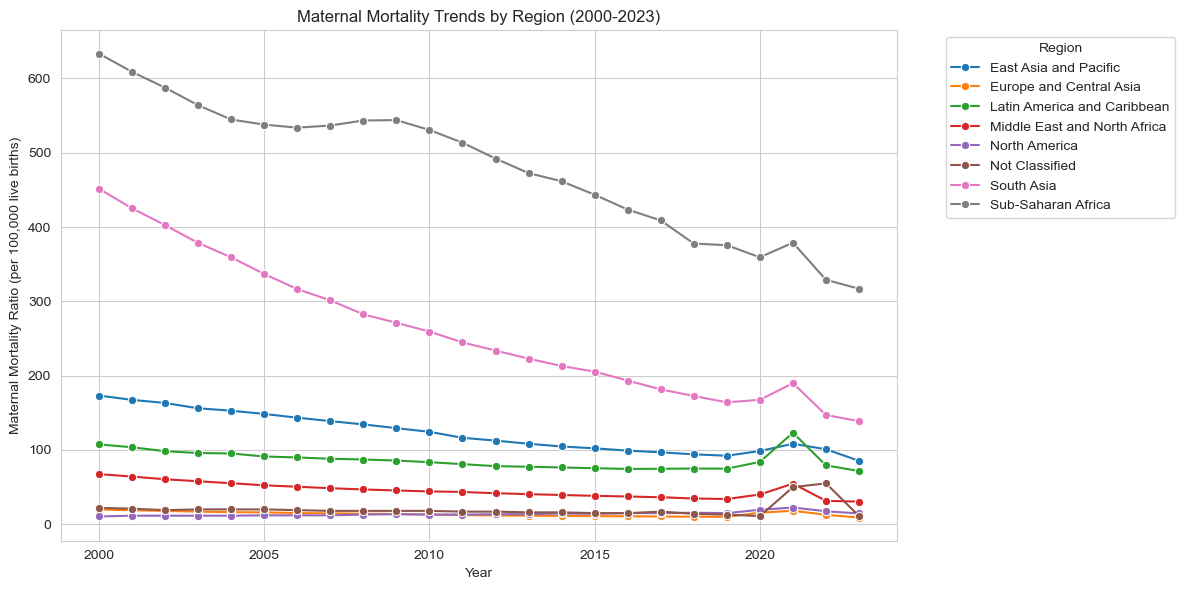

In [24]:
plt.figure(figsize=(12,6))

sns.lineplot(
    data = regional_trends,
    x= 'Year',
    y= 'MMR',
    hue= 'URR',
    marker= 'o'
)

plt.title("Maternal Mortality Trends by Region (2000-2023)")
plt.ylabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.xlabel("Year")
plt.legend(title= "Region", bbox_to_anchor= (1.05,1), loc = 'upper left')
plt.tight_layout()
plt.show()

In [25]:
#find best and worst regions

slowest_region = percent_change.idxmax()
best_region = percent_change.idxmin()

print(f"Region with slowest improvement: {slowest_region}")
print(f"Region with best improvement: {best_region}")

Region with slowest improvement: North America
Region with best improvement: South Asia


In [26]:
#Build palette with highlights
all_regions = regional_trends['URR'].unique()
palette = {region: "grey" for region in all_regions}

palette[slowest_region] = "red"
palette[best_region] = "green"

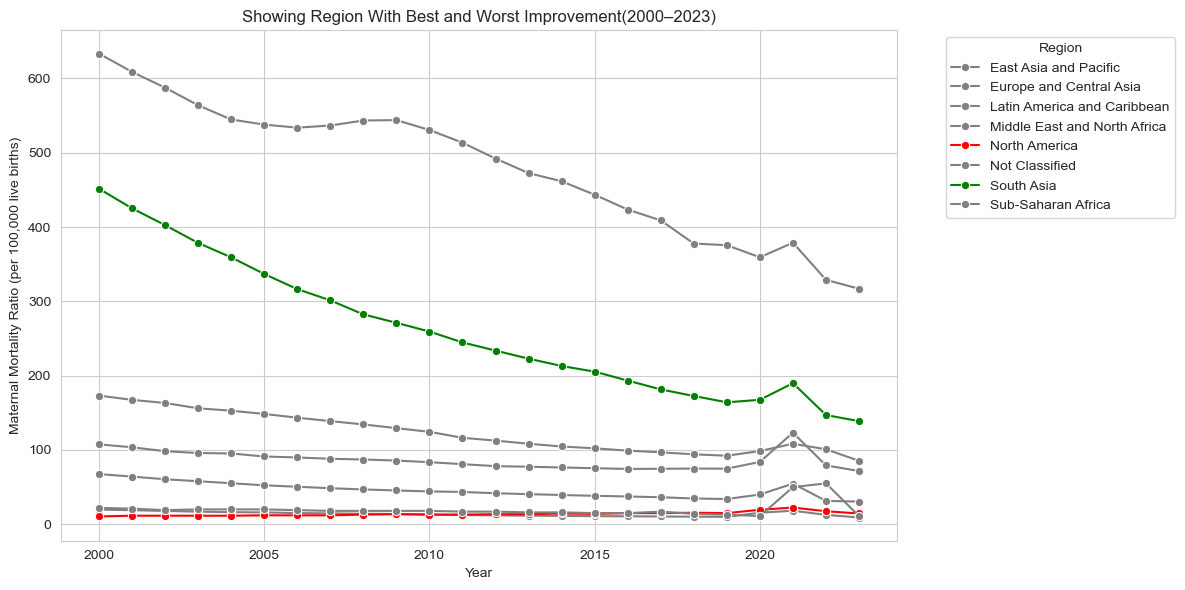

In [27]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=regional_trends,
    x='Year',
    y='MMR',
    hue='URR',
    palette=palette,
    marker='o'
)

plt.title("Showing Region With Best and Worst Improvement(2000–2023)")
plt.ylabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.xlabel("Year")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Pivot for easier comparison
pivot_trends = regional_trends.pivot(index='URR', columns='Year', values='MMR')

# Build summary
progress_summary = pd.DataFrame({
    "MMR_2000": pivot_trends[2000],
    "MMR_2023": pivot_trends[2023],
})

progress_summary["PercentChange"] = ((progress_summary["MMR_2023"] - progress_summary["MMR_2000"]) 
                                     / progress_summary["MMR_2000"]) * 100

progress_summary = progress_summary.sort_values("MMR_2023", ascending=False)
progress_summary

,MMR_2000,MMR_2023,PercentChange
URR,,,
Sub-Saharan Africa,633.448980,316.959184,-49.962950
South Asia,451.625000,138.750000,-69.277609
East Asia and Pacific,173.193548,85.354839,-50.717080
Latin America and Caribbean,107.545455,71.666667,-33.361510
Middle East and North Africa,67.473684,30.526316,-54.758190
North America,10.500000,14.500000,38.095238
Not Classified,22.000000,11.000000,-50.000000
Europe and Central Asia,19.788462,9.057692,-54.227405


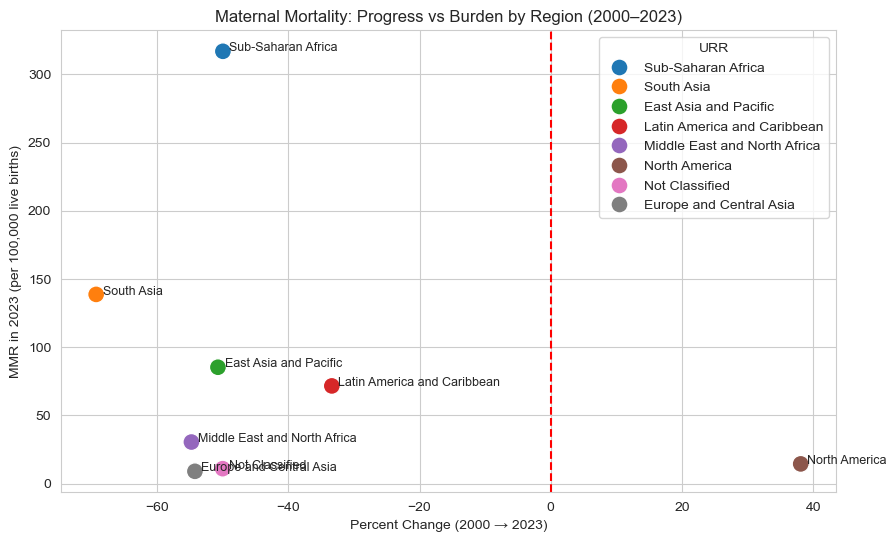

In [29]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=progress_summary,
    x="PercentChange",
    y="MMR_2023",
    hue=progress_summary.index,   # color by region
    s=150                         # dot size
)

# Add labels for each point
for region, row in progress_summary.iterrows():
    plt.text(row["PercentChange"]+1, row["MMR_2023"], region, fontsize=9)

plt.axvline(0, color="red", linestyle="--")   # Vertical line at 0% (no change)
plt.title("Maternal Mortality: Progress vs Burden by Region (2000–2023)")
plt.xlabel("Percent Change (2000 → 2023)")
plt.ylabel("MMR in 2023 (per 100,000 live births)")
plt.show()

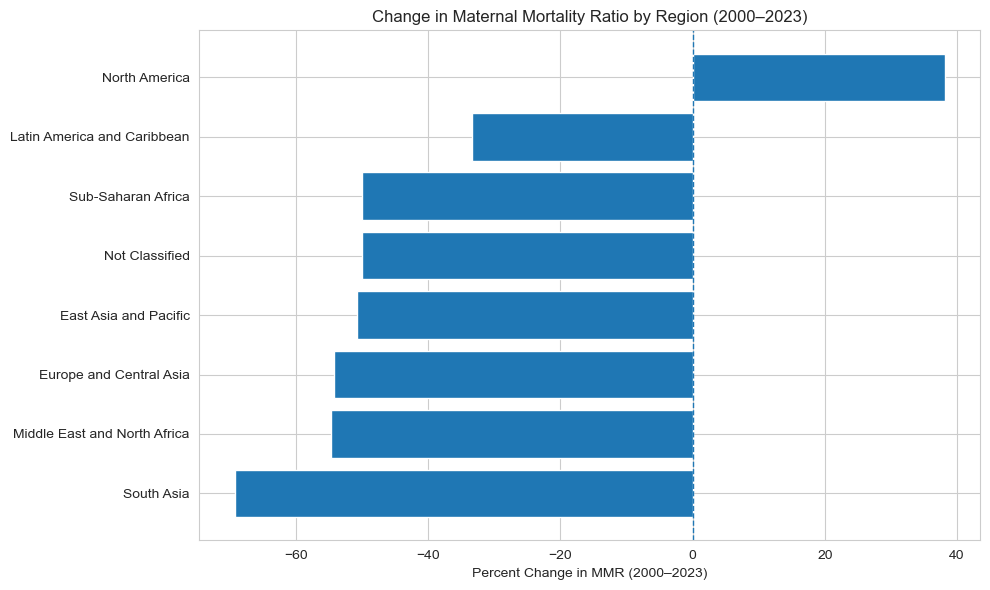

In [30]:
plt.figure(figsize=(10,6))

# Sort by percent change for readability
progress_summary_sorted = progress_summary.sort_values("PercentChange")

plt.barh(
    progress_summary_sorted.index,
    progress_summary_sorted["PercentChange"]
)

plt.axvline(0, linestyle="--", linewidth=1)  # no-change reference line
plt.xlabel("Percent Change in MMR (2000–2023)")
plt.title("Change in Maternal Mortality Ratio by Region (2000–2023)")

plt.tight_layout()
plt.show()

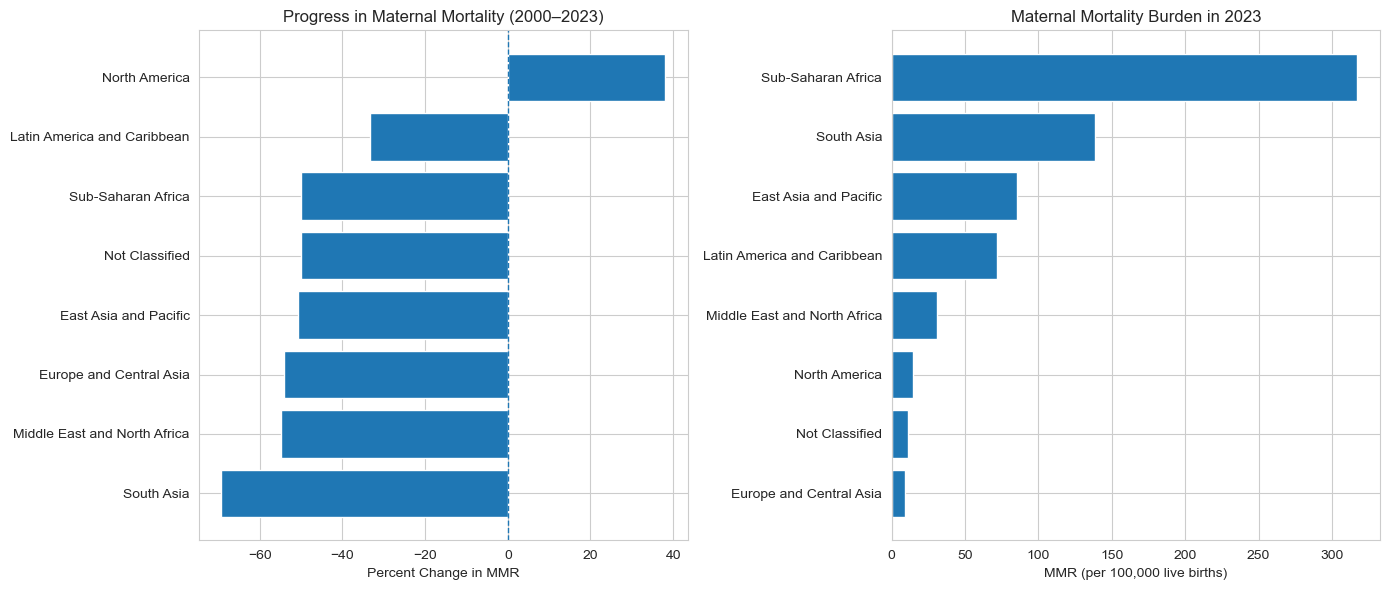

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Sort once for consistency
sorted_regions = progress_summary.sort_values("PercentChange")

# ---- Panel A: Progress ----
axes[0].barh(
    sorted_regions.index,
    sorted_regions["PercentChange"]
)
axes[0].axvline(0, linestyle="--", linewidth=1)
axes[0].set_title("Progress in Maternal Mortality (2000–2023)")
axes[0].set_xlabel("Percent Change in MMR")

# ---- Panel B: Burden ----
sorted_burden = progress_summary.sort_values("MMR_2023")

axes[1].barh(
    sorted_burden.index,
    sorted_burden["MMR_2023"]
)
axes[1].set_title("Maternal Mortality Burden in 2023")
axes[1].set_xlabel("MMR (per 100,000 live births)")

plt.tight_layout()
plt.show()

In [32]:
#Inequality-over-time analysis
#For each year, get max MMR (worst region) and min MMR (best region)

gap_trend = regional_trends.groupby("Year")["MMR"].agg(["max", "min"])

#calculate the gap
gap_trend["Gap"] = gap_trend["max"] - gap_trend["min"]
gap_trend

,max,min,Gap
Year,,,
2000,633.448980,10.500000,622.948980
2001,608.877551,11.500000,597.377551
2002,587.612245,11.500000,576.112245
2003,563.979592,11.500000,552.479592
2004,544.775510,11.500000,533.275510
2005,537.897959,12.000000,525.897959
2006,533.795918,12.000000,521.795918
2007,536.653061,12.000000,524.653061
2008,543.408163,13.000000,530.408163


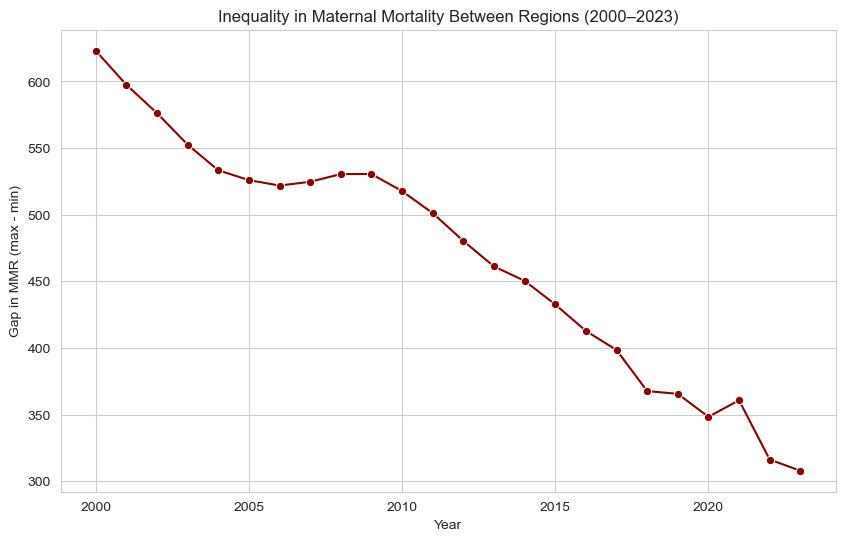

In [33]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=gap_trend,
    x=gap_trend.index,
    y="Gap",
    marker="o",
    color="darkred"
)

plt.title("Inequality in Maternal Mortality Between Regions (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Gap in MMR (max - min)")
plt.grid(True)
plt.show()

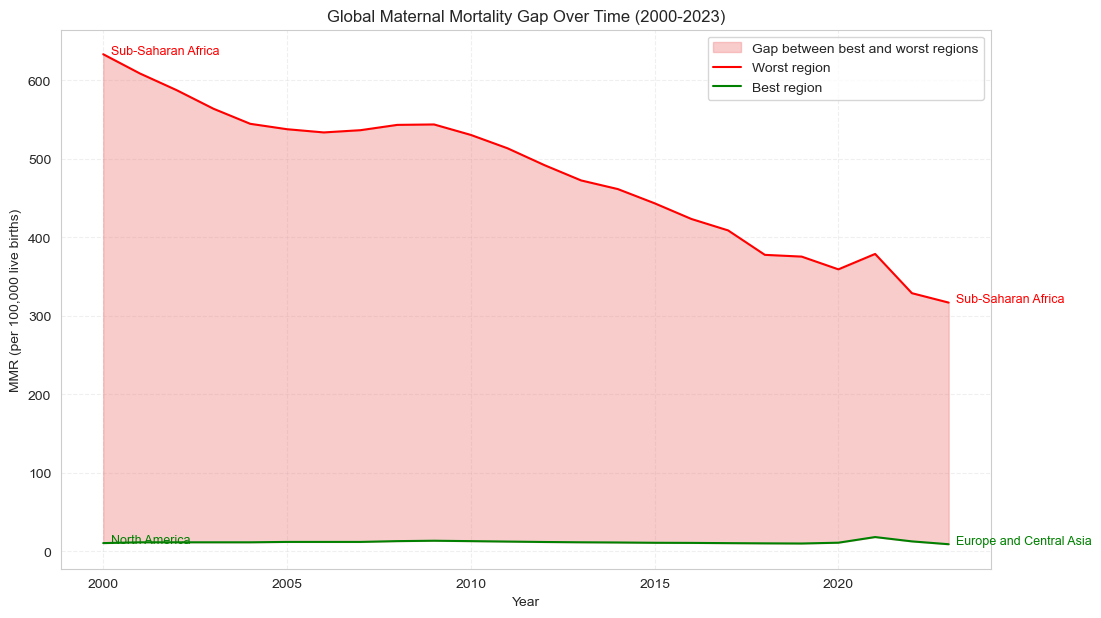

In [34]:
# 1️ Compute max, min, and gap per year
gap_trend = regional_trends.groupby("Year")["MMR"].agg(["max", "min"])
gap_trend["Gap"] = gap_trend["max"] - gap_trend["min"]

# 1a️ Find the corresponding regions for max and min
# For each year, get the region with highest and lowest MMR
worst_region = regional_trends.loc[regional_trends.groupby("Year")["MMR"].idxmax()][["Year","URR","MMR"]]
best_region  = regional_trends.loc[regional_trends.groupby("Year")["MMR"].idxmin()][["Year","URR","MMR"]]

# 2️ Plot the inequality area
plt.figure(figsize=(12,7))

plt.fill_between(
    gap_trend.index,        
    gap_trend['min'],       
    gap_trend['max'],       
    color='lightcoral',
    alpha=0.4,
    label='Gap between best and worst regions'
)

plt.plot(gap_trend.index, gap_trend['max'], color='red', label='Worst region')
plt.plot(gap_trend.index, gap_trend['min'], color='green', label='Best region')

# 3 Annotate the best and worst region names at start and end
for year in [2000, 2023]:
    w_row = worst_region[worst_region["Year"]==year]
    b_row = best_region[best_region["Year"]==year]
    plt.text(year+0.2, w_row["MMR"].values[0], w_row["URR"].values[0], color="red", fontsize=9)
    plt.text(year+0.2, b_row["MMR"].values[0], b_row["URR"].values[0], color="green", fontsize=9)

plt.title("Global Maternal Mortality Gap Over Time (2000-2023)")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.show()

In [35]:
#Average maternal mortality ratio by region using UPR
regional_avg1 = df_long.groupby('UPR')['MMR'].mean().sort_values(ascending = False)
regional_avg1

UPR
West and Central Africa            559.644097
Eastern and Southern Africa        409.827899
South Asia                         260.817708
East Asia and the Pacific          135.403274
Latin America and the Caribbean     86.316919
Middle East and North Africa        76.158333
Europe and Central Asia             21.315476
Not Classified                      20.000000
Industrialized                       8.730856
Name: MMR, dtype: float64

In [36]:
#Average MMR by UPR in 2020
upr_2020 = df_long[df_long['Year']==2020].groupby('UPR')['MMR'].mean().sort_values(ascending = False)
upr_2020

UPR
West and Central Africa            454.708333
Eastern and Southern Africa        270.826087
South Asia                         167.500000
East Asia and the Pacific          108.535714
Latin America and the Caribbean     83.909091
Middle East and North Africa        61.150000
Europe and Central Asia             18.809524
Industrialized                      12.756757
Not Classified                      11.000000
Name: MMR, dtype: float64

In [37]:
#Average MMR by UPR in 2023
upr_2023 = df_long[df_long['Year']==2023].groupby('UPR')['MMR'].mean().sort_values(ascending = False)
upr_2023

UPR
West and Central Africa            385.541667
Eastern and Southern Africa        254.782609
South Asia                         138.750000
East Asia and the Pacific           94.071429
Latin America and the Caribbean     71.666667
Middle East and North Africa        49.800000
Europe and Central Asia             12.714286
Not Classified                      11.000000
Industrialized                       6.675676
Name: MMR, dtype: float64

In [38]:
# Pivot table for all years by UPR
pivot_upr = df_long.pivot_table(index='UPR', columns='Year', values='MMR', aggfunc='mean')
# Percent change
upr_percent_change = ((pivot_upr[2023] - pivot_upr[2000]) / pivot_upr[2000]) * 100
upr_percent_change = upr_percent_change.sort_values()
upr_percent_change

UPR
South Asia                        -69.277609
Europe and Central Asia           -61.471861
Middle East and North Africa      -58.825961
Eastern and Southern Africa       -54.068036
East Asia and the Pacific         -50.692624
Not Classified                    -50.000000
West and Central Africa           -45.999416
Industrialized                    -37.150127
Latin America and the Caribbean   -33.361510
dtype: float64

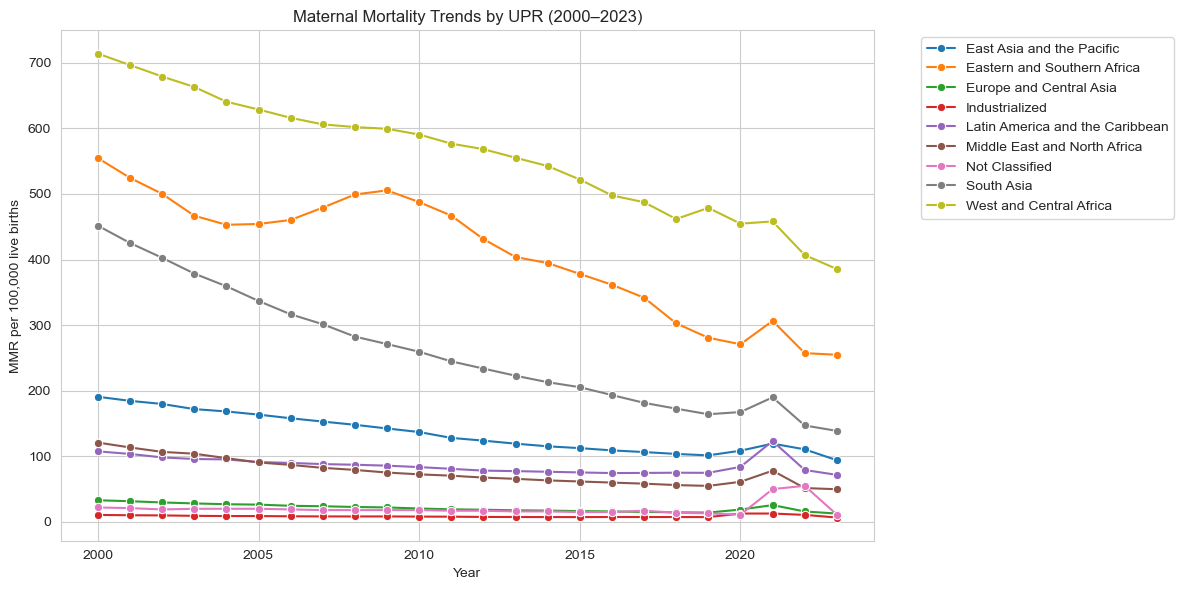

In [39]:
# Average MMR by UPR and year
upr_trends = df_long.groupby(['UPR','Year'])['MMR'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=upr_trends,
    x='Year',
    y='MMR',
    hue='UPR',
    marker='o'
)
plt.title("Maternal Mortality Trends by UPR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
#Country-level analysis
#Group by country and year

country_trends = df_long.groupby(['Country', 'Year'])['MMR'].mean().reset_index()
country_trends.head()

,Country,Year,MMR
0,Afghanistan,2000,1372.0
1,Afghanistan,2001,1311.0
2,Afghanistan,2002,1263.0
3,Afghanistan,2003,1201.0
4,Afghanistan,2004,1166.0


In [41]:
df_long[
    (df_long['URR'] == 'North America') &
    (df_long['Year'].isin([2000, 2023]))
].sort_values(['Year', 'Country'])


,ISO Code,Country,UPR,URR,USRR,Year,MMR
31,CAN,Canada,Industrialized,North America,North America,2000,9
186,USA,United States,Industrialized,North America,North America,2000,12
4516,CAN,Canada,Industrialized,North America,North America,2023,12
4671,USA,United States,Industrialized,North America,North America,2023,17


In [42]:
df_long[
    (df_long['URR'] == 'North America') &
    (df_long['Year'] == 2000)
]['MMR'].mean()

10.5

In [43]:
df_long[
    (df_long['URR'] == 'North America') &
    (df_long['Year'] == 2023)
]['MMR'].mean()

14.5

In [44]:
df_long[
    (df_long['URR'] == 'Not Classified') &
    (df_long['Year'].isin([2000, 2023]))
].sort_values(['Year', 'Country'])


,ISO Code,Country,UPR,URR,USRR,Year,MMR
137,PRI,Puerto Rico,Not Classified,Not Classified,Not Classified,2000,22
4622,PRI,Puerto Rico,Not Classified,Not Classified,Not Classified,2023,11


In [45]:
df_long[
    (df_long['URR'] == 'East Asia and Pacific') &
    (df_long['Year'].isin([2000, 2023]))
].sort_values(['Year', 'Country'])


,ISO Code,Country,UPR,URR,USRR,Year,MMR
8,AUS,Australia,Industrialized,East Asia and Pacific,East Asia and Pacific,2000,7
24,BRN,Brunei Darussalam,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2000,48
29,KHM,Cambodia,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2000,476
35,CHN,China,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2000,56
39,COK,Cook Islands,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2000,0
...,...,...,...,...,...,...,...
4659,TLS,Timor-Leste,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,192
4661,TON,Tonga,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,67
4666,TUV,Tuvalu,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,170
4674,VUT,Vanuatu,East Asia and the Pacific,East Asia and Pacific,East Asia and Pacific,2023,100


In [46]:
"""Cells 41-45 are a result of confusion with regional trends. I was stuck for hours, only to find out that I was misreading a line"""

'Cells 41-45 are a result of confusion with regional trends. I was stuck for hours, only to find out that I was misreading a line'

In [47]:
#Country-level analysis
#Group by country and year

country_trends = df_long.groupby(['Country', 'Year'])['MMR'].mean().reset_index()
country_trends.head()

,Country,Year,MMR
0,Afghanistan,2000,1372.0
1,Afghanistan,2001,1311.0
2,Afghanistan,2002,1263.0
3,Afghanistan,2003,1201.0
4,Afghanistan,2004,1166.0


In [48]:
country_trends.tail()

,Country,Year,MMR
4675,Zimbabwe,2019,388.0
4676,Zimbabwe,2020,380.0
4677,Zimbabwe,2021,446.0
4678,Zimbabwe,2022,368.0
4679,Zimbabwe,2023,358.0


In [49]:
# Pivot to show comparison
# Shows each country as a row and year as a column
pivot_country = country_trends.pivot(index = 'Country', columns = 'Year', values = 'MMR')

# Percent change 2000 - 2023
country_percent_change = ((pivot_country[2023] - pivot_country[2000])/ pivot_country[2000]) * 100
country_percent_change = country_percent_change.sort_values()
country_percent_change.head(10)
#country_percent_change.tail(10)

Country
Belarus        -95.000000
Bhutan         -85.493827
Mozambique     -84.380952
Kazakhstan     -82.758621
Russia         -82.352941
Laos           -81.609195
Estonia        -81.481481
Turkmenistan   -80.000000
Norway         -80.000000
Bangladesh     -78.011472
dtype: float64

In [50]:
country_percent_change.tail(10)

Country
Gabon                  30.898876
Canada                 33.333333
United States          41.666667
Bahamas                49.019608
Mauritius              53.488372
Jamaica                58.536585
Dominican Republic     63.157895
Portugal               66.666667
Venezuela             163.953488
Cook Islands                 NaN
dtype: float64

In [51]:
#Countries with the smallest number in 2023
pivot_country[2023].nsmallest(5)

Country
Cook Islands    0.0
Belarus         1.0
Norway          1.0
Australia       2.0
Israel          2.0
Name: 2023, dtype: float64

In [52]:
#Countries with the largest number in 2023
pivot_country[2023].nlargest(5)

Country
Nigeria                     993.0
Chad                        748.0
Central African Republic    692.0
South Sudan                 692.0
Liberia                     628.0
Name: 2023, dtype: float64

In [53]:
# Lowest 5 (best performers)
lowest_2023 = pivot_country[2023].nsmallest(5)
print("Lowest MMR countries in 2023:")
print(lowest_2023)

# Highest 5 (worst performers)
highest_2023 = pivot_country[2023].nlargest(5)
print("\nHighest MMR countries in 2023:")
print(highest_2023)

Lowest MMR countries in 2023:
Country
Cook Islands    0.0
Belarus         1.0
Norway          1.0
Australia       2.0
Israel          2.0
Name: 2023, dtype: float64

Highest MMR countries in 2023:
Country
Nigeria                     993.0
Chad                        748.0
Central African Republic    692.0
South Sudan                 692.0
Liberia                     628.0
Name: 2023, dtype: float64


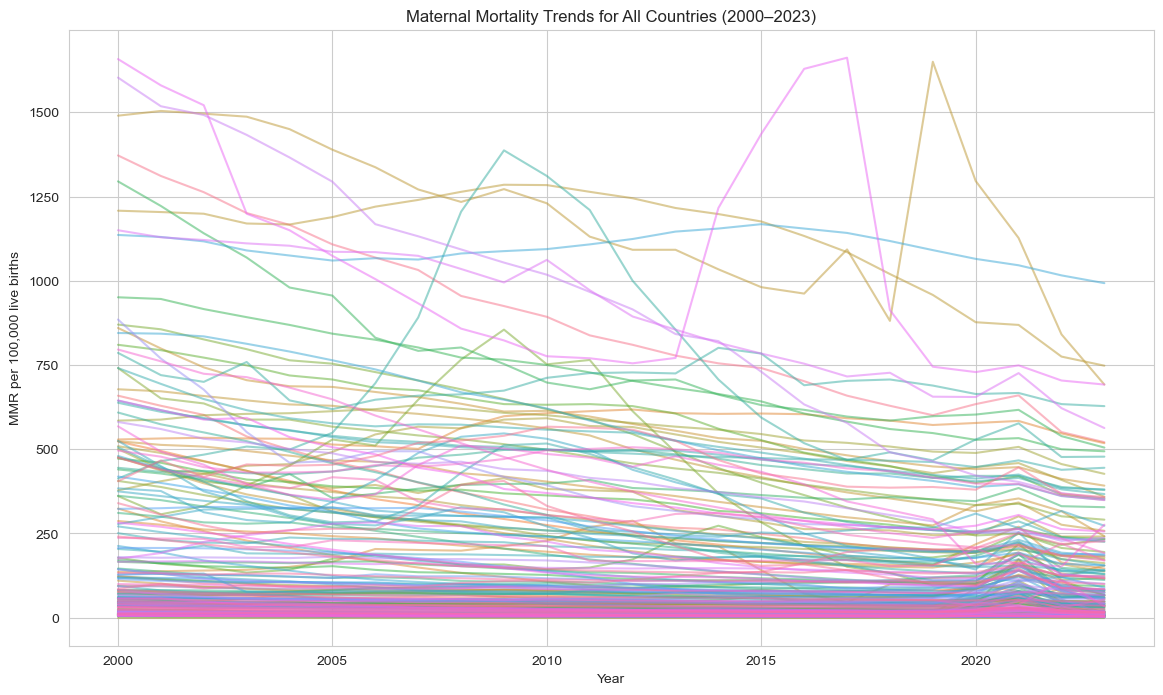

In [54]:
plt.figure(figsize=(14,8))
sns.lineplot(
    data=country_trends,
    x='Year',
    y='MMR',
    hue='Country',
    legend=False,  # hides messy legend (too many countries)
    alpha=0.5      # makes lines transparent
)
plt.title("Maternal Mortality Trends for All Countries (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.show()

In [55]:
df_long[
    (df_long['Country'] == 'Belarus') &
    (df_long['Year'].isin([2000, 2023]))
].sort_values('Year')

,ISO Code,Country,UPR,URR,USRR,Year,MMR
15,BLR,Belarus,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,2000,20
4500,BLR,Belarus,Europe and Central Asia,Europe and Central Asia,Eastern Europe and Central Asia,2023,1


In [56]:
pivot_country['Absolute Change'] = pivot_country[2023] - pivot_country[2000]
country_percent_change = ((pivot_country[2023] - pivot_country[2000])/ pivot_country[2000]) * 100

top_relative = country_percent_change.sort_values().head(10)
top_absolute = pivot_country['Absolute Change'].sort_values().head(10)

In [57]:
top_relative

Country
Belarus        -95.000000
Bhutan         -85.493827
Mozambique     -84.380952
Kazakhstan     -82.758621
Russia         -82.352941
Laos           -81.609195
Estonia        -81.481481
Turkmenistan   -80.000000
Norway         -80.000000
Bangladesh     -78.011472
dtype: float64

In [58]:
top_absolute

Country
Sierra Leone               -1249.0
South Sudan                 -966.0
Afghanistan                 -851.0
Central African Republic    -798.0
Guinea-Bissau               -790.0
Ethiopia                    -675.0
Rwanda                      -656.0
Timor-Leste                 -604.0
Somalia                     -587.0
Laos                        -497.0
Name: Absolute Change, dtype: float64

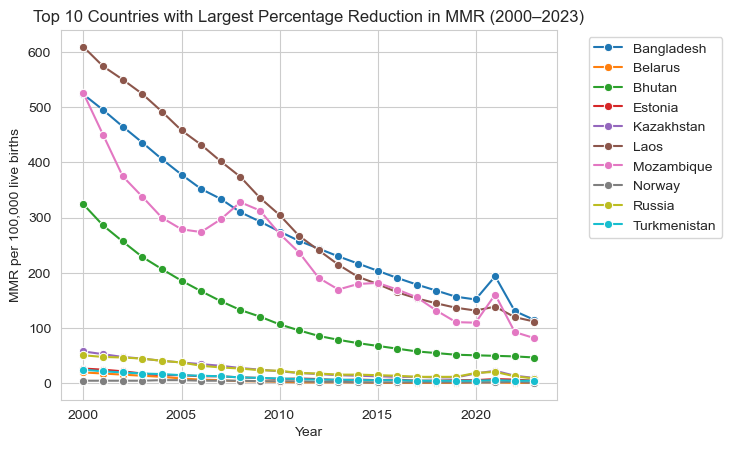

In [59]:
top10 = top_relative.index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(top10)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Largest Percentage Reduction in MMR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

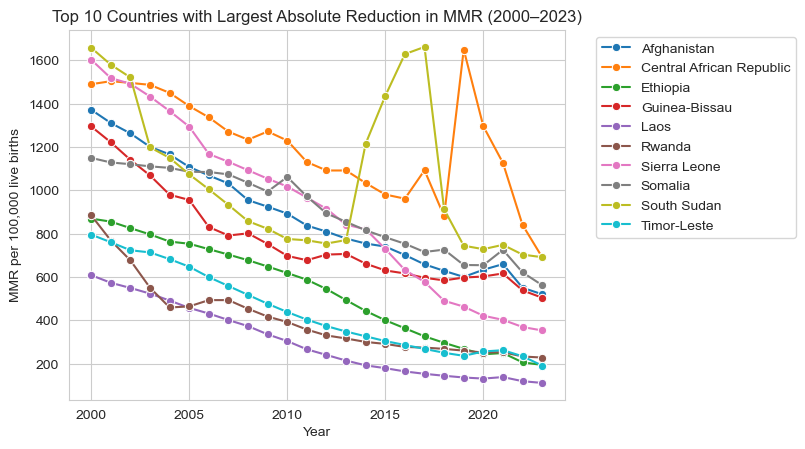

In [60]:
top10a = top_absolute.index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(top10a)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Largest Absolute Reduction in MMR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

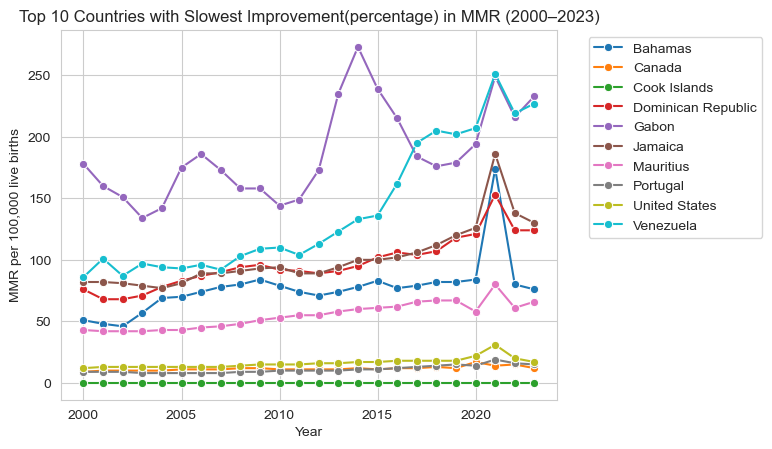

In [61]:
bottom10 = country_percent_change.sort_values().tail(10).index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(bottom10)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Slowest Improvement(percentage) in MMR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

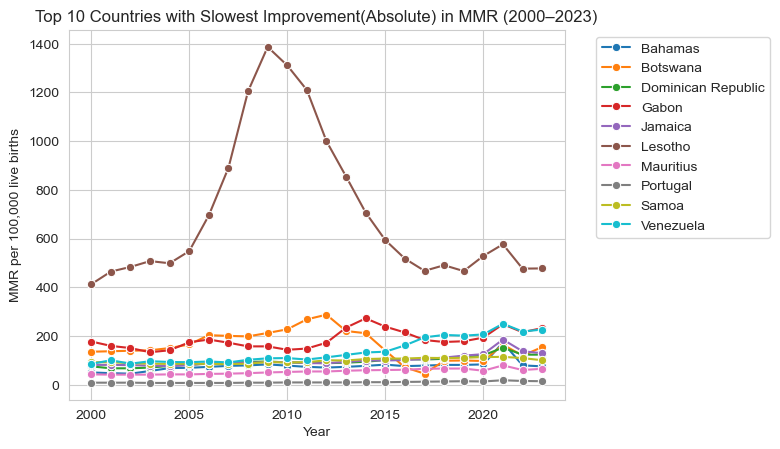

In [62]:
bottom10a = pivot_country['Absolute Change'].sort_values().tail(10).index
sns.lineplot(
    data=country_trends[country_trends['Country'].isin(bottom10a)],
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries with Slowest Improvement(Absolute) in MMR (2000–2023)")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

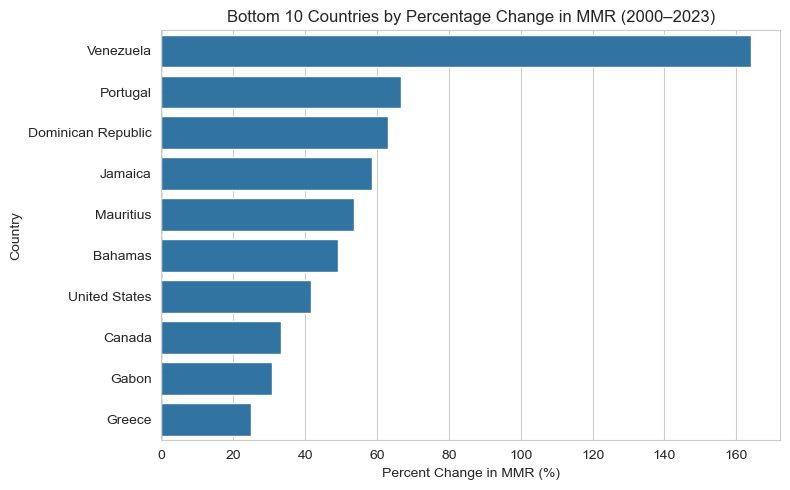

In [63]:
# Bottom 10 countries by percent change (worst improvement)
bottom10_percent = country_percent_change.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=bottom10_percent.values,
    y=bottom10_percent.index,
    orient='h'
)

plt.axvline(0, linestyle='--', linewidth=1)
plt.title("Bottom 10 Countries by Percentage Change in MMR (2000–2023)")
plt.xlabel("Percent Change in MMR (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

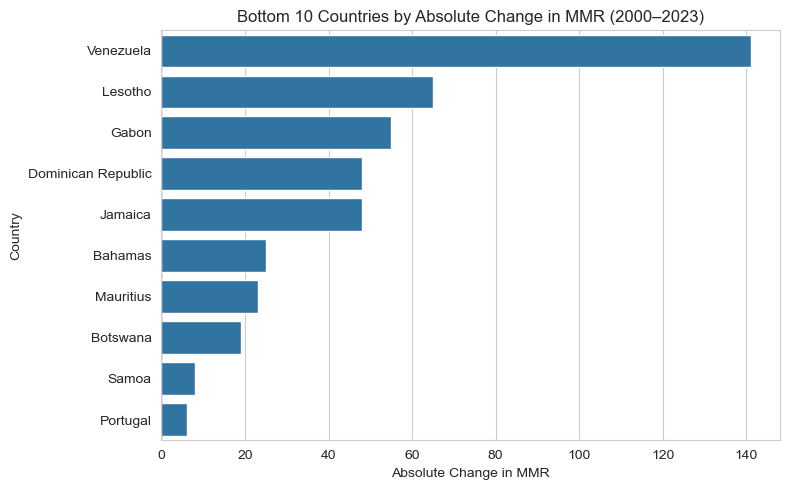

In [64]:
# Bottom 10 countries by absolute change (worst improvement)
bottom10_absolute = pivot_country['Absolute Change'].sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(
    x=bottom10_absolute.values,
    y=bottom10_absolute.index,
    orient='h'
)

plt.axvline(0, linestyle='--', linewidth=1)
plt.title("Bottom 10 Countries by Absolute Change in MMR (2000–2023)")
plt.xlabel("Absolute Change in MMR")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [65]:
df_long[
    (df_long['Country'].isin([
        'Venezuela','Lesotho','Gabon','Dominican Republic',
        'Jamaica','Bahamas','Mauritius','Botswana','Samoa','Portugal'
    ])) &
    (df_long['Year'].isin([2000, 2023]))
].sort_values(['Country', 'Year'])

,ISO Code,Country,UPR,URR,USRR,Year,MMR
11,BHS,Bahamas,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2000,51
4496,BHS,Bahamas,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2023,76
22,BWA,Botswana,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2000,136
4507,BWA,Botswana,Eastern and Southern Africa,Sub-Saharan Africa,Eastern and Southern Africa,2023,155
51,DOM,Dominican Republic,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2000,76
4536,DOM,Dominican Republic,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2023,124
62,GAB,Gabon,West and Central Africa,Sub-Saharan Africa,West and Central Africa,2000,178
4547,GAB,Gabon,West and Central Africa,Sub-Saharan Africa,West and Central Africa,2023,233
84,JAM,Jamaica,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2000,82
4569,JAM,Jamaica,Latin America and the Caribbean,Latin America and Caribbean,Latin America and Caribbean,2023,130


In [66]:
# Create country-level summary for 2000 and 2023
country_summary = (
    df_long[df_long["Year"].isin([2000, 2023])]
    .pivot_table(
        index="Country",
        columns="Year",
        values="MMR",
        aggfunc="mean"
    )
    .reset_index()
)

# Rename columns for clarity
country_summary.columns = ["Country", "MMR_2000", "MMR_2023"]

# Drop countries with missing values
country_summary = country_summary.dropna()

In [67]:
# Absolute change (raw burden reduction)
country_summary["AbsoluteChange"] = (
    country_summary["MMR_2023"] - country_summary["MMR_2000"]
)

# Percent change (relative improvement)
country_summary["PercentChange"] = (
    (country_summary["MMR_2023"] - country_summary["MMR_2000"])
    / country_summary["MMR_2000"]
) * 100

# Improvement score (positive = reduction in MMR)
country_summary["Improvement"] = -country_summary["PercentChange"]

In [68]:
median_improvement = country_summary["Improvement"].median()
median_mmr_2023 = country_summary["MMR_2023"].median()

In [69]:
def label_quadrant(row):
    if row["Improvement"] >= median_improvement and row["MMR_2023"] <= median_mmr_2023:
        return "High Progress, Low Burden"
    if row["Improvement"] >= median_improvement and row["MMR_2023"] > median_mmr_2023:
        return "High Progress, High Burden"
    if row["Improvement"] < median_improvement and row["MMR_2023"] <= median_mmr_2023:
        return "Low Progress, Low Burden"
    return "Low Progress, High Burden"

country_summary["Quadrant"] = country_summary.apply(label_quadrant, axis=1)

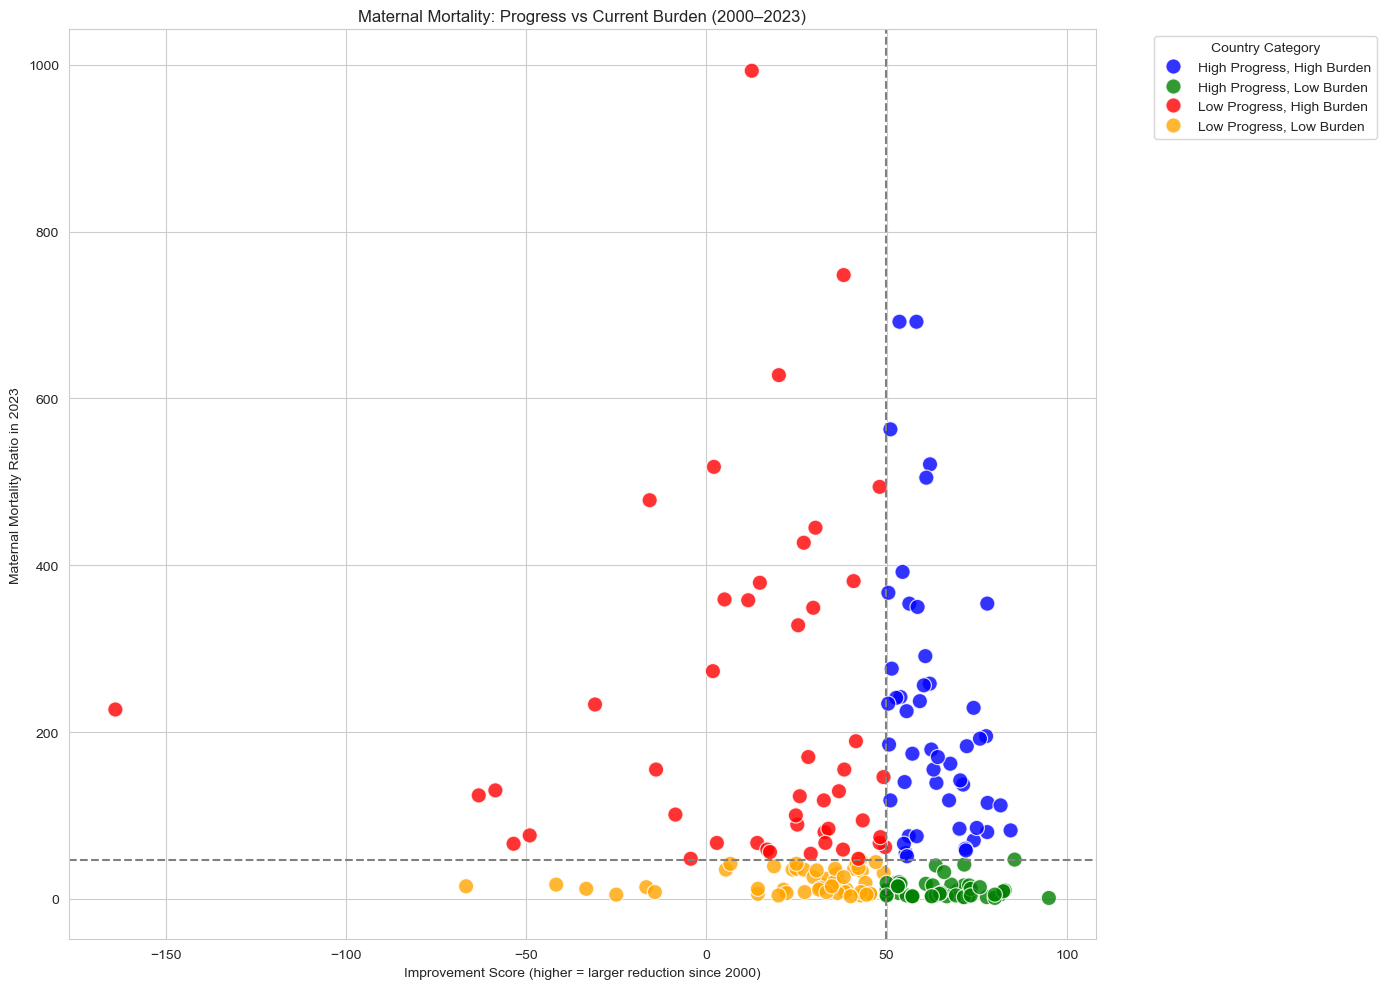

In [70]:
plt.figure(figsize=(14,10))

sns.scatterplot(
    data=country_summary,
    x="Improvement",
    y="MMR_2023",
    hue="Quadrant",
    palette={
        "High Progress, Low Burden": "green",
        "High Progress, High Burden": "blue",
        "Low Progress, Low Burden": "orange",
        "Low Progress, High Burden": "red"
    },
    s=120,
    alpha=0.8
)

# Median reference lines
plt.axvline(median_improvement, color="gray", linestyle="--")
plt.axhline(median_mmr_2023, color="gray", linestyle="--")

plt.title("Maternal Mortality: Progress vs Current Burden (2000–2023)")
plt.xlabel("Improvement Score (higher = larger reduction since 2000)")
plt.ylabel("Maternal Mortality Ratio in 2023")

plt.legend(title="Country Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

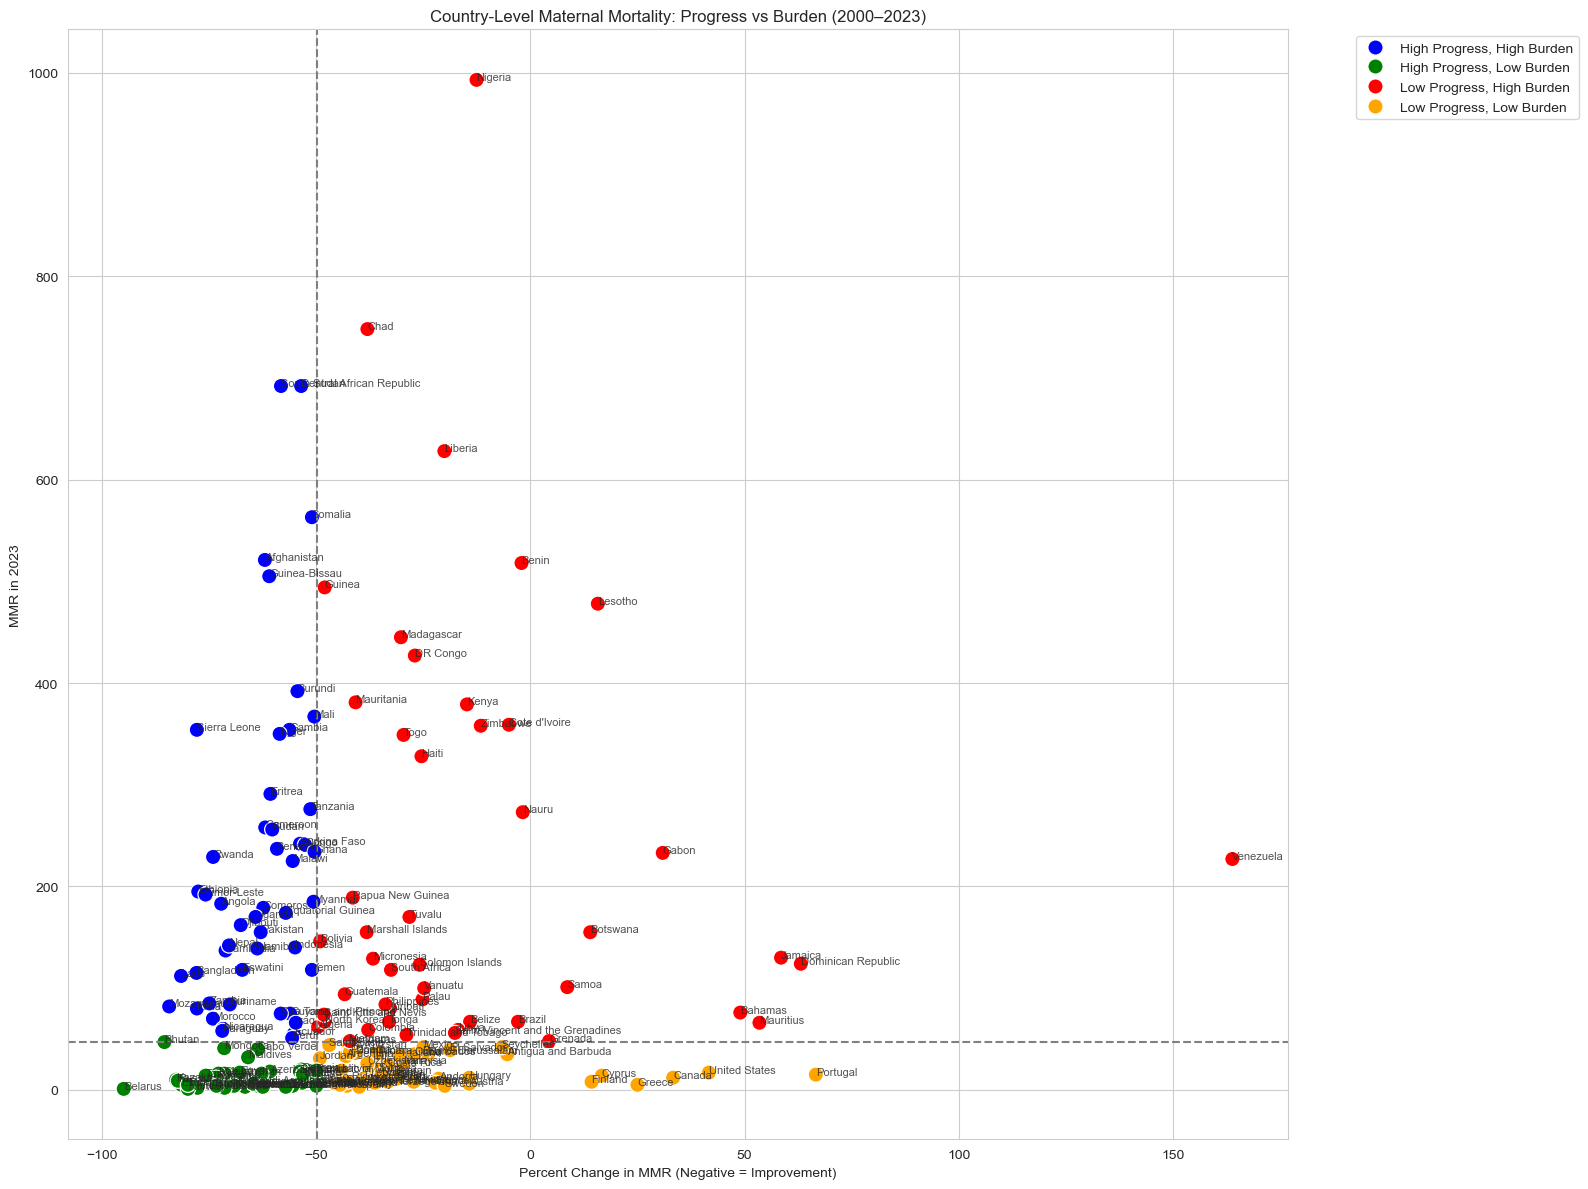

In [71]:
country_summary["PercentChange"] = (
    (country_summary["MMR_2023"] - country_summary["MMR_2000"])
    / country_summary["MMR_2000"]
) * 100
#Define medians
median_change = country_summary["PercentChange"].median()
median_mmr = country_summary["MMR_2023"].median()
#Quadrants (negative = good)
def label_quadrant(row):
    if row["PercentChange"] <= median_change and row["MMR_2023"] <= median_mmr:
        return "High Progress, Low Burden"
    if row["PercentChange"] <= median_change and row["MMR_2023"] > median_mmr:
        return "High Progress, High Burden"
    if row["PercentChange"] > median_change and row["MMR_2023"] <= median_mmr:
        return "Low Progress, Low Burden"
    return "Low Progress, High Burden"

country_summary["Quadrant"] = country_summary.apply(label_quadrant, axis=1)

plt.figure(figsize=(16,12))

palette = {
    "High Progress, Low Burden": "green",   
    "High Progress, High Burden": "blue",  
    "Low Progress, Low Burden": "orange",    
    "Low Progress, High Burden": "red"    
}

sns.scatterplot(
    data=country_summary,
    x="PercentChange",   
    y="MMR_2023",
    hue="Quadrant",
    palette=palette,
    s=120,
    alpha=1
)
# Median lines
plt.axvline(median_change, color="gray", linestyle="--")
plt.axhline(median_mmr, color="gray", linestyle="--")

# Label ALL countries
for _, row in country_summary.iterrows():
    plt.text(
        row["PercentChange"],
        row["MMR_2023"],
        row["Country"],
        fontsize=8,
        alpha=0.8
    )

plt.title("Country-Level Maternal Mortality: Progress vs Burden (2000–2023)")
plt.xlabel("Percent Change in MMR (Negative = Improvement)")
plt.ylabel("MMR in 2023")

plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

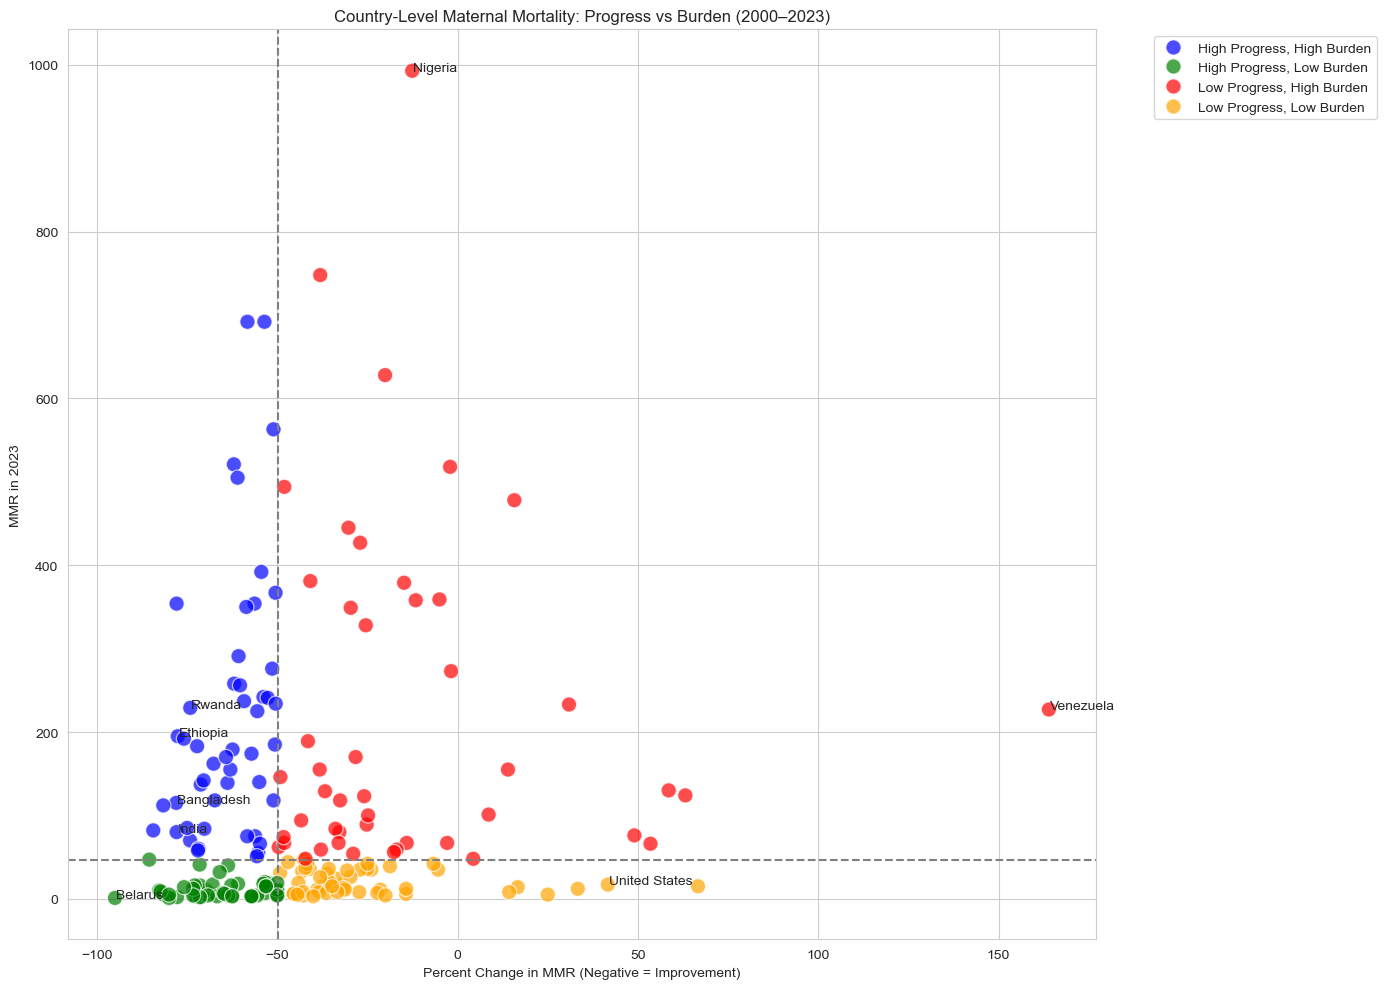

In [72]:
# Highlight countries you want to show
highlight = ["Nigeria", "India", "United States", "Ethiopia", "Bangladesh", "Belarus", "Rwanda", "Venezuela"]

plt.figure(figsize=(14,10))

palette = {
    "High Progress, Low Burden": "green",
    "High Progress, High Burden": "blue",
    "Low Progress, Low Burden": "orange",
    "Low Progress, High Burden": "red"
}

sns.scatterplot(
    data=country_summary,
    x="PercentChange",
    y="MMR_2023",
    hue="Quadrant",
    palette=palette,
    s=120,
    alpha=0.7
)

# Median lines
plt.axvline(country_summary["PercentChange"].median(), color="gray", linestyle="--")
plt.axhline(country_summary["MMR_2023"].median(), color="gray", linestyle="--")

# Label only highlighted countries
for _, row in country_summary[country_summary["Country"].isin(highlight)].iterrows():
    plt.text(
        row["PercentChange"] + 0.3,  # slight offset for readability
        row["MMR_2023"] + 0.3,
        row["Country"],
        fontsize=10
    )

plt.title("Country-Level Maternal Mortality: Progress vs Burden (2000–2023)")
plt.xlabel("Percent Change in MMR (Negative = Improvement)")
plt.ylabel("MMR in 2023")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

In [73]:
# Create a new column for decade
df_long['Decade'] = (df_long['Year'] // 10) * 10

# Average MMR per country per decade
decade_trends = df_long.groupby(['Country', 'Decade'])['MMR'].mean().reset_index()

decade_trends

,Country,Decade,MMR
0,Afghanistan,2000,1140.20
1,Afghanistan,2010,740.60
2,Afghanistan,2020,591.50
3,Albania,2000,12.10
4,Albania,2010,8.70
...,...,...,...
580,Zambia,2010,193.90
581,Zambia,2020,103.25
582,Zimbabwe,2000,471.50
583,Zimbabwe,2010,468.40


In [74]:
decade_wide = decade_trends.pivot(
    index="Country",
    columns="Decade",
    values="MMR"
)
print(decade_wide.head(10))
print()
print(decade_wide.tail(10))

Decade                 2000   2010    2020
Country                                   
Afghanistan          1140.2  740.6  591.50
Albania                12.1    8.7    9.00
Algeria                95.0   78.8   75.50
Andorra                12.6   10.6   23.50
Angola                494.7  254.4  193.50
Antigua and Barbuda    33.6   30.8   34.50
Argentina              59.6   43.3   47.00
Armenia                33.4   25.5   36.50
Australia               5.4    5.7    3.75
Austria                 6.1    6.4    6.25

Decade           2000   2010    2020
Country                             
United Kingdom   12.2    9.2   12.50
United States    13.2   16.8   22.50
Uruguay          21.0   16.2   26.00
Uzbekistan       38.7   31.4   27.50
Vanuatu         125.6  109.1  109.00
Venezuela        95.8  148.3  226.00
Vietnam          70.9   57.6   50.00
Yemen           190.4  136.6  133.50
Zambia          308.0  193.9  103.25
Zimbabwe        471.5  468.4  388.00


In [75]:
from IPython.display import display

display(decade_wide)

Decade,2000,2010,2020
Country,,,
Afghanistan,1140.2,740.6,591.50
Albania,12.1,8.7,9.00
Algeria,95.0,78.8,75.50
Andorra,12.6,10.6,23.50
Angola,494.7,254.4,193.50
...,...,...,...
Venezuela,95.8,148.3,226.00
Vietnam,70.9,57.6,50.00
Yemen,190.4,136.6,133.50


In [76]:
display(decade_wide.head(10))
display(decade_wide.tail(10))

Decade,2000,2010,2020
Country,,,
Afghanistan,1140.2,740.6,591.50
Albania,12.1,8.7,9.00
Algeria,95.0,78.8,75.50
Andorra,12.6,10.6,23.50
Angola,494.7,254.4,193.50
Antigua and Barbuda,33.6,30.8,34.50
Argentina,59.6,43.3,47.00
Armenia,33.4,25.5,36.50
Australia,5.4,5.7,3.75


Decade,2000,2010,2020
Country,,,
United Kingdom,12.2,9.2,12.50
United States,13.2,16.8,22.50
Uruguay,21.0,16.2,26.00
Uzbekistan,38.7,31.4,27.50
Vanuatu,125.6,109.1,109.00
Venezuela,95.8,148.3,226.00
Vietnam,70.9,57.6,50.00
Yemen,190.4,136.6,133.50
Zambia,308.0,193.9,103.25


In [77]:
selected_countries = decade_wide.loc[['Nigeria', 'Kenya']]
display(selected_countries)

Decade,2000,2010,2020
Country,,,
Nigeria,1090.7,1130.1,1030.00
Kenya,451.0,461.2,402.25


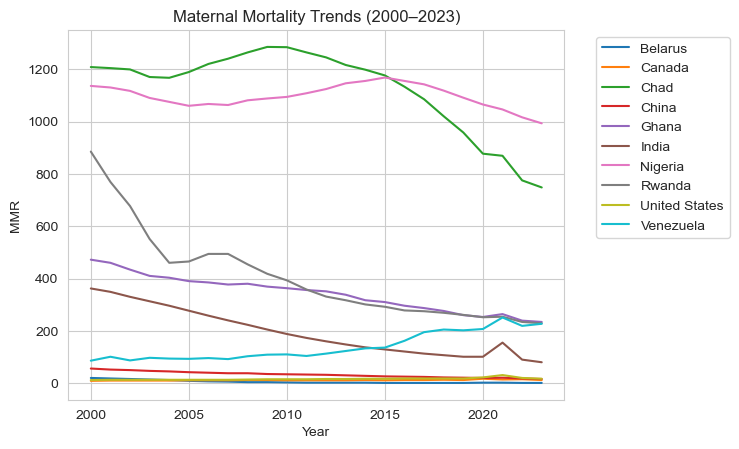

In [78]:
#Visualising specific countries

countries = ["Nigeria", "United States", "Belarus", "Rwanda", "Venezuela", "Chad", "India", "China", "Canada", "Ghana"]

sns.lineplot(
    data=df_long[df_long['Country'].isin(countries)],
    x="Year", y="MMR", hue="Country"
)

plt.title("Maternal Mortality Trends (2000–2023)")
plt.ylabel("MMR")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [79]:
# Pivot the country data for easier selection
pivot_country = country_trends.pivot(index='Country', columns='Year', values='MMR')

# Top 10 countries in 2000 (highest MMR)
top10_2000 = pivot_country[2000].nlargest(10)
top10_2000

Country
South Sudan                 1658.0
Sierra Leone                1603.0
Central African Republic    1490.0
Afghanistan                 1372.0
Guinea-Bissau               1295.0
Chad                        1208.0
Somalia                     1150.0
Nigeria                     1136.0
Guinea                       951.0
Rwanda                       885.0
Name: 2000, dtype: float64

In [80]:
# Get MMR in 2023 for the same countries
top10_2023 = pivot_country.loc[top10_2000.index, 2023]
top10_2023

Country
South Sudan                 692.0
Sierra Leone                354.0
Central African Republic    692.0
Afghanistan                 521.0
Guinea-Bissau               505.0
Chad                        748.0
Somalia                     563.0
Nigeria                     993.0
Guinea                      494.0
Rwanda                      229.0
Name: 2023, dtype: float64

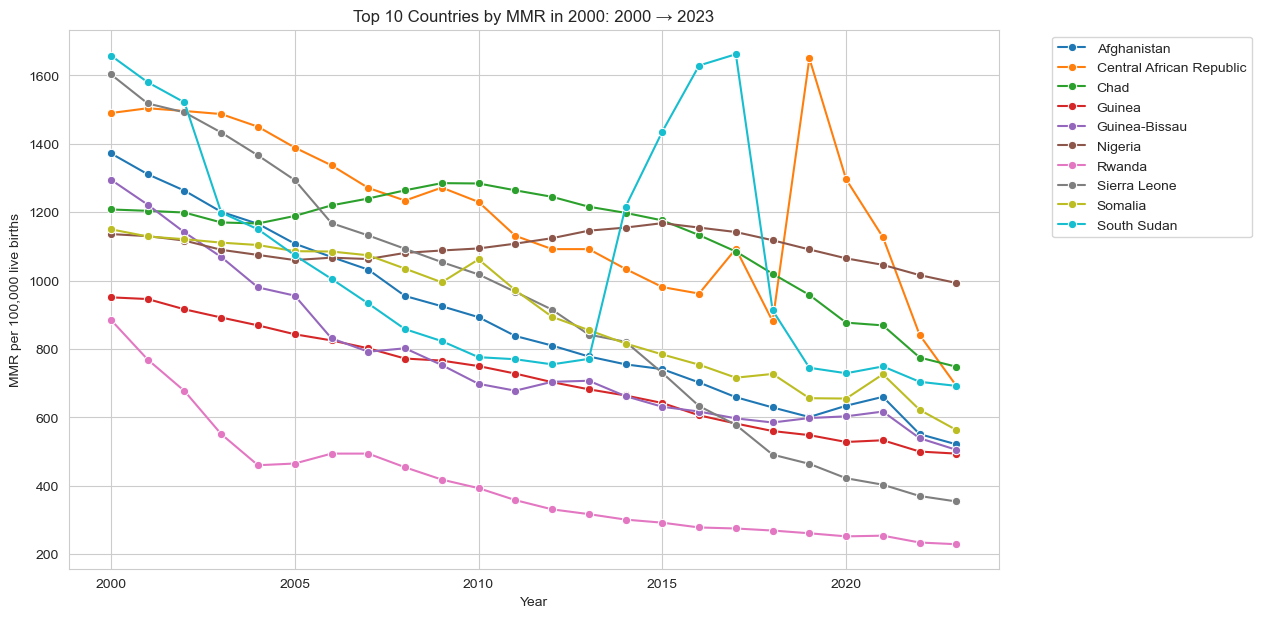

In [81]:
# Filter the long-format dataframe for only these top 10 countries
top10_countries = top10_2000.index
top10_trends = df_long[df_long['Country'].isin(top10_countries)]

plt.figure(figsize=(12,7))
sns.lineplot(
    data=top10_trends,
    x='Year',
    y='MMR',
    hue='Country',
    marker='o'
)
plt.title("Top 10 Countries by MMR in 2000: 2000 → 2023")
plt.ylabel("MMR per 100,000 live births")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

In [82]:
# Pivot: countries as rows, years as columns
pivot_country = country_trends.pivot(index="Country", columns="Year", values="MMR")

# Top 10 highest in 2000
top10_2000 = pivot_country[2000].nlargest(10)
top10_2000

# Extract 2023 values for those same countries
top10_2023 = pivot_country.loc[top10_2000.index, 2023]

# Combine into a comparison table
comparison = pd.DataFrame({
    "MMR_2000": top10_2000,
    "MMR_2023": top10_2023
})
comparison["AbsoluteChange"] = comparison["MMR_2023"] - comparison["MMR_2000"]
comparison["PercentChange"] = ((comparison["MMR_2023"] - comparison["MMR_2000"]) / comparison["MMR_2000"]) * 100

comparison


,MMR_2000,MMR_2023,AbsoluteChange,PercentChange
Country,,,,
South Sudan,1658.0,692.0,-966.0,-58.262967
Sierra Leone,1603.0,354.0,-1249.0,-77.916407
Central African Republic,1490.0,692.0,-798.0,-53.557047
Afghanistan,1372.0,521.0,-851.0,-62.026239
Guinea-Bissau,1295.0,505.0,-790.0,-61.003861
Chad,1208.0,748.0,-460.0,-38.079470
Somalia,1150.0,563.0,-587.0,-51.043478
Nigeria,1136.0,993.0,-143.0,-12.588028
Guinea,951.0,494.0,-457.0,-48.054679


In [83]:
# Sort by percent change (best improvers first)
comparison.sort_values("PercentChange")

,MMR_2000,MMR_2023,AbsoluteChange,PercentChange
Country,,,,
Sierra Leone,1603.0,354.0,-1249.0,-77.916407
Rwanda,885.0,229.0,-656.0,-74.124294
Afghanistan,1372.0,521.0,-851.0,-62.026239
Guinea-Bissau,1295.0,505.0,-790.0,-61.003861
South Sudan,1658.0,692.0,-966.0,-58.262967
Central African Republic,1490.0,692.0,-798.0,-53.557047
Somalia,1150.0,563.0,-587.0,-51.043478
Guinea,951.0,494.0,-457.0,-48.054679
Chad,1208.0,748.0,-460.0,-38.079470


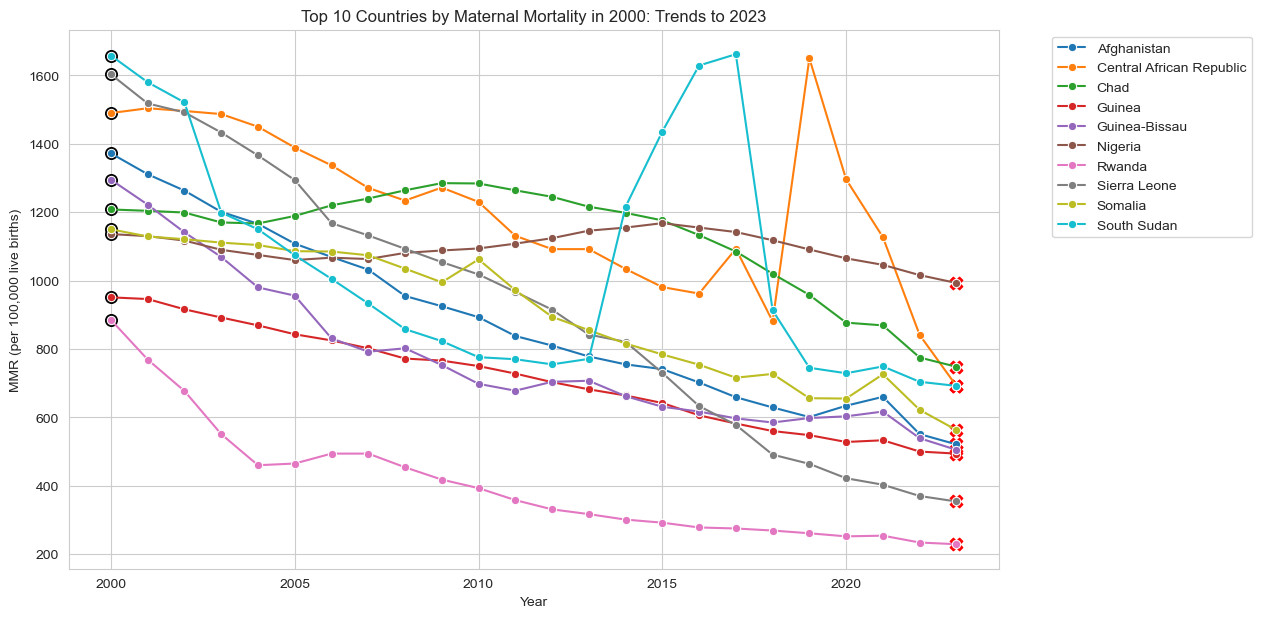

In [84]:
# Filter long-format data for just those 10 countries
top10_countries = top10_2000.index
top10_trends = df_long[df_long["Country"].isin(top10_countries)]

plt.figure(figsize=(12,7))
sns.lineplot(
    data=top10_trends,
    x="Year",
    y="MMR",
    hue="Country",
    marker="o"
)

# Add start and end markers
for country in top10_countries:
    y2000 = pivot_country.loc[country, 2000]
    y2023 = pivot_country.loc[country, 2023]
    plt.scatter(2000, y2000, color="black", s=70, marker="o")  # start
    plt.scatter(2023, y2023, color="red", s=80, marker="X")    # end

plt.title("Top 10 Countries by Maternal Mortality in 2000: Trends to 2023")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.xlabel("Year")
plt.show()

In [85]:
# Find country with slowest improvement (highest or least negative percent change)
slowest_country = comparison["PercentChange"].idxmax()
slowest_country

'Nigeria'

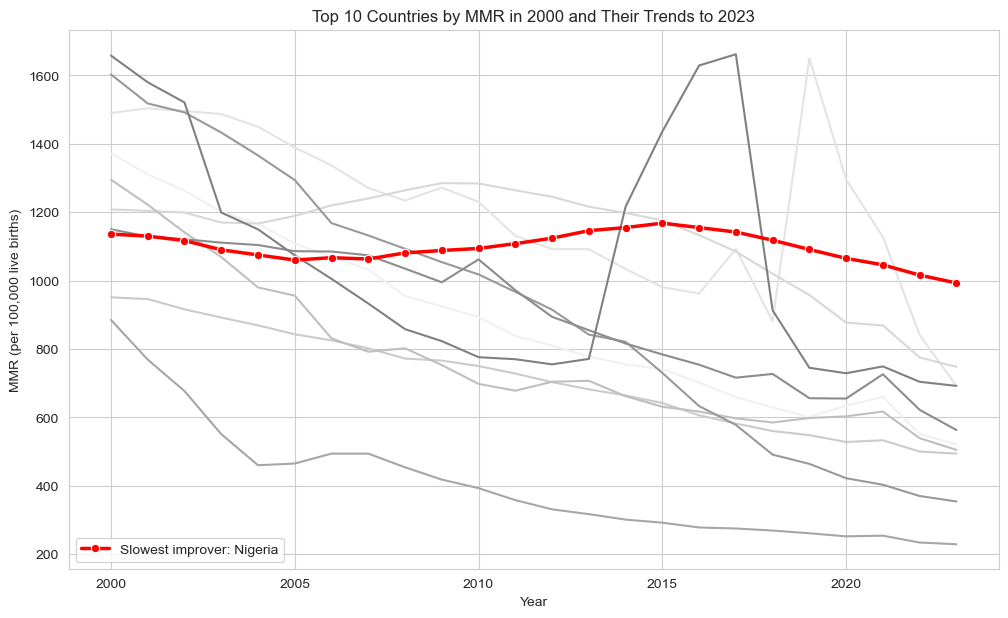

In [86]:
plt.figure(figsize=(12,7))

# Plot all top 10 countries in grey
sns.lineplot(
    data=top10_trends,
    x="Year",
    y="MMR",
    hue="Country",
    palette="light:grey",
    legend=False,
    linewidth=1.5
)

# Overlay the slowest improver in red
sns.lineplot(
    data=top10_trends[top10_trends["Country"] == slowest_country],
    x="Year",
    y="MMR",
    color="red",
    linewidth=2.5,
    marker="o",
    label=f"Slowest improver: {slowest_country}"
)

plt.title("Top 10 Countries by MMR in 2000 and Their Trends to 2023")
plt.ylabel("MMR (per 100,000 live births)")
plt.xlabel("Year")
plt.legend()
plt.show()

In [87]:
# Combine percent change + 2023 burden
top10_summary = pd.DataFrame({
    "2000": pivot_country.loc[top10_countries, 2000],
    "2023": pivot_country.loc[top10_countries, 2023],
    "PercentChange": comparison.loc[top10_countries, "PercentChange"]
}).sort_values("2023", ascending=False)

top10_summary

,2000,2023,PercentChange
Country,,,
Nigeria,1136.0,993.0,-12.588028
Chad,1208.0,748.0,-38.079470
South Sudan,1658.0,692.0,-58.262967
Central African Republic,1490.0,692.0,-53.557047
Somalia,1150.0,563.0,-51.043478
Afghanistan,1372.0,521.0,-62.026239
Guinea-Bissau,1295.0,505.0,-61.003861
Guinea,951.0,494.0,-48.054679
Sierra Leone,1603.0,354.0,-77.916407


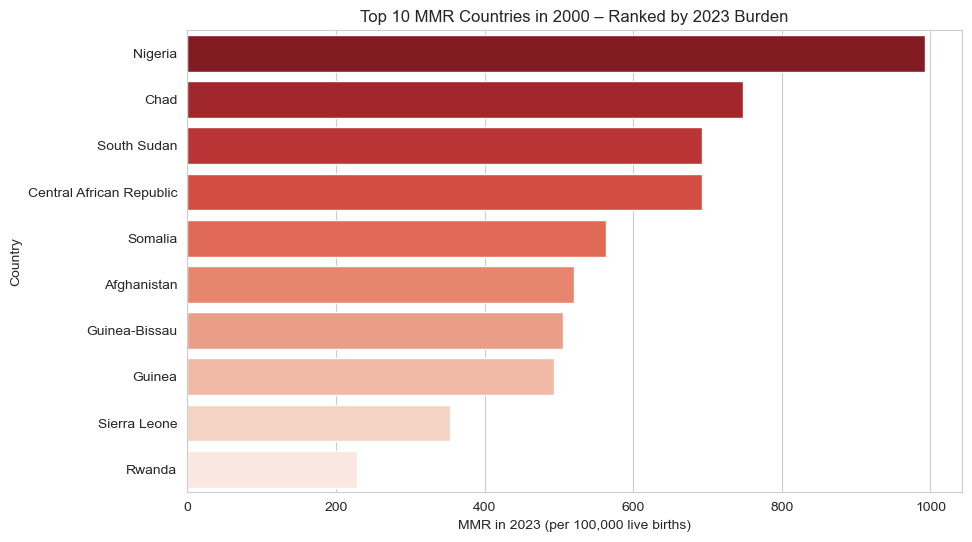

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_summary.reset_index(),
    x="2023",
    y="Country",
    hue="Country",   # <-- use the country as the hue
    palette="Reds_r",
    dodge=False,     # make sure bars don’t split
    legend=False     # no need for a duplicate legend
)
plt.title("Top 10 MMR Countries in 2000 – Ranked by 2023 Burden")
plt.xlabel("MMR in 2023 (per 100,000 live births)")
plt.ylabel("Country")
plt.show()

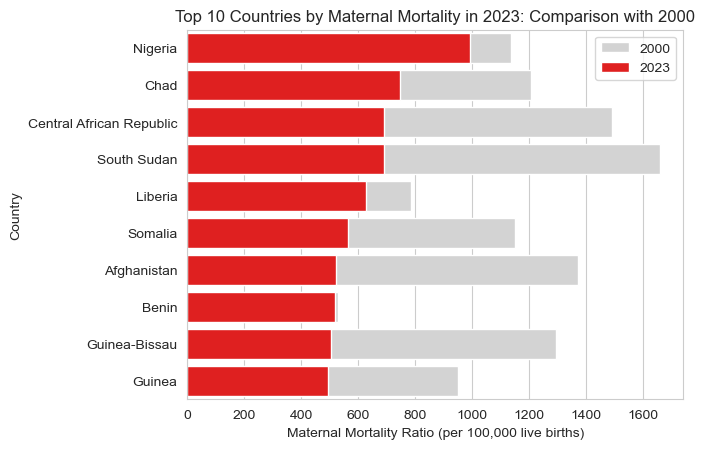

In [89]:
# Top 10 countries by MMR in 2023
top10_2023 = pivot_country[2023].nlargest(10)
top10_countries = top10_2023.index

top10_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_countries, 2023]
}).sort_values("MMR_2023", ascending=False)

top10_comparison

# Plot 2000 values in light grey
sns.barplot(
    data=top10_comparison.reset_index(),
    x="MMR_2000",
    y="Country",
    color="lightgrey",
    label="2000"
)

# Overlay 2023 values in red
sns.barplot(
    data=top10_comparison.reset_index(),
    x="MMR_2023",
    y="Country",
    color="red",
    label="2023"
)

plt.xlabel("Maternal Mortality Ratio (per 100,000 live births)")
plt.title("Top 10 Countries by Maternal Mortality in 2023: Comparison with 2000")
plt.legend()
plt.show()

In [90]:
# Top 10 highest MMR in 2000
top10_2000 = pivot_country[2000].nlargest(10)
top10_2000_countries = top10_2000.index

# Create comparison table
top10_2000_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_2000_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_2000_countries, 2023]
}).sort_values("MMR_2000", ascending=False)

top10_2000_comparison

,MMR_2000,MMR_2023
Country,,
South Sudan,1658.0,692.0
Sierra Leone,1603.0,354.0
Central African Republic,1490.0,692.0
Afghanistan,1372.0,521.0
Guinea-Bissau,1295.0,505.0
Chad,1208.0,748.0
Somalia,1150.0,563.0
Nigeria,1136.0,993.0
Guinea,951.0,494.0


In [91]:
# Top 10 highest MMR in 2023
top10_2023 = pivot_country[2023].nlargest(10)
top10_2023_countries = top10_2023.index

# Create comparison table
top10_2023_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_2023_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_2023_countries, 2023]
}).sort_values("MMR_2023", ascending=False)

top10_2023_comparison

,MMR_2000,MMR_2023
Country,,
Nigeria,1136.0,993.0
Chad,1208.0,748.0
Central African Republic,1490.0,692.0
South Sudan,1658.0,692.0
Liberia,786.0,628.0
Somalia,1150.0,563.0
Afghanistan,1372.0,521.0
Benin,529.0,518.0
Guinea-Bissau,1295.0,505.0


In [92]:
# Top 10 worst in 2000
top10_2000 = pivot_country[2000].nlargest(10)
top10_2000_countries = top10_2000.index
top10_2000_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_2000_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_2000_countries, 2023]
}).sort_values("MMR_2000", ascending=False)

# Top 10 worst in 2023
top10_2023 = pivot_country[2023].nlargest(10)
top10_2023_countries = top10_2023.index
top10_2023_comparison = pd.DataFrame({
    "MMR_2000": pivot_country.loc[top10_2023_countries, 2000],
    "MMR_2023": pivot_country.loc[top10_2023_countries, 2023]
}).sort_values("MMR_2023", ascending=False)

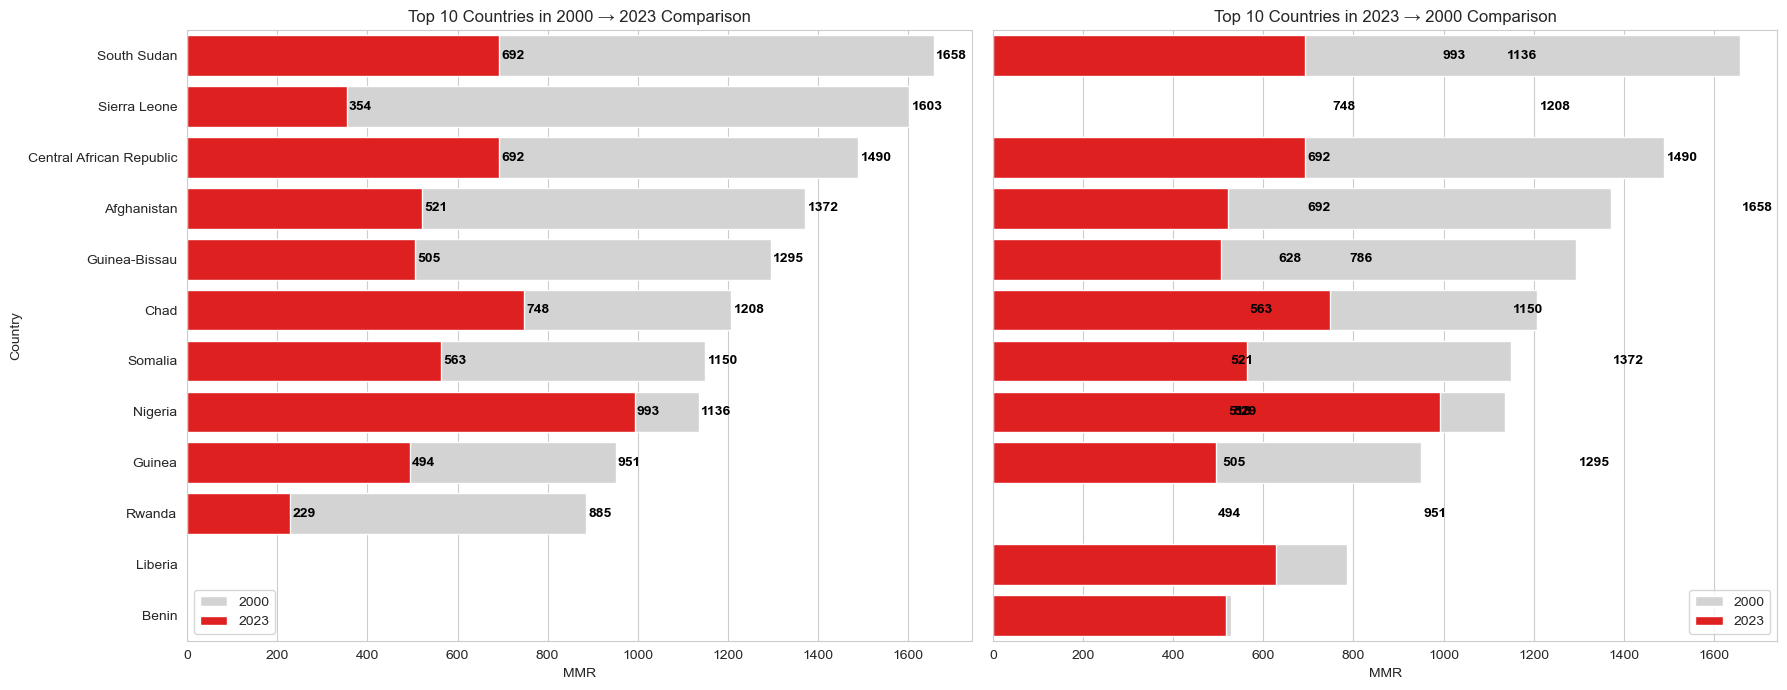

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(18,7), sharey=True)

# Function to annotate bars
def annotate_bars(ax, data, col):
    for i, val in enumerate(data[col]):
        ax.text(val + 5, i, f"{val:.0f}", va='center', color='black', fontweight='bold')

# Left: Top 10 worst in 2000
sns.barplot(
    data=top10_2000_comparison.reset_index(),
    x="MMR_2000",
    y="Country",
    color="lightgrey",
    ax=axes[0],
    label="2000"
)
sns.barplot(
    data=top10_2000_comparison.reset_index(),
    x="MMR_2023",
    y="Country",
    color="red",
    ax=axes[0],
    label="2023"
)
axes[0].set_title("Top 10 Countries in 2000 → 2023 Comparison")
axes[0].set_xlabel("MMR")
axes[0].set_ylabel("Country")
annotate_bars(axes[0], top10_2000_comparison.reset_index(), "MMR_2000")
annotate_bars(axes[0], top10_2000_comparison.reset_index(), "MMR_2023")

# Right: Top 10 worst in 2023
sns.barplot(
    data=top10_2023_comparison.reset_index(),
    x="MMR_2000",
    y="Country",
    color="lightgrey",
    ax=axes[1],
    label="2000"
)
sns.barplot(
    data=top10_2023_comparison.reset_index(),
    x="MMR_2023",
    y="Country",
    color="red",
    ax=axes[1],
    label="2023"
)
axes[1].set_title("Top 10 Countries in 2023 → 2000 Comparison")
axes[1].set_xlabel("MMR")
axes[1].set_ylabel("")
annotate_bars(axes[1], top10_2023_comparison.reset_index(), "MMR_2000")
annotate_bars(axes[1], top10_2023_comparison.reset_index(), "MMR_2023")

plt.tight_layout()
plt.show()


In [94]:
# Worst country per year
worst_countries = df_long.loc[df_long.groupby("Year")["MMR"].idxmax(), ["Year", "Country", "MMR"]]

# Best country per year
best_countries = df_long.loc[df_long.groupby("Year")["MMR"].idxmin(), ["Year", "Country", "MMR"]]

In [95]:
global_summary = df_long.groupby("Year")["MMR"].agg(
    avg="mean",
    worst="max",
    best="min"
).reset_index()

# Add country names for best and worst
global_summary = global_summary.merge(
    worst_countries.rename(columns={"MMR": "worst", "Country": "worst_country"}),
    on=["Year", "worst"],
    how="left"
)

global_summary = global_summary.merge(
    best_countries.rename(columns={"MMR": "best", "Country": "best_country"}),
    on=["Year", "best"],
    how="left"
)
global_summary

,Year,avg,worst,best,worst_country,best_country
0,2000,235.507692,1658,0,South Sudan,Cook Islands
1,2001,226.123077,1580,0,South Sudan,Cook Islands
2,2002,217.666667,1521,0,South Sudan,Cook Islands
3,2003,208.676923,1487,0,Central African Republic,Cook Islands
4,2004,201.984615,1450,0,Central African Republic,Cook Islands
5,2005,197.620513,1389,0,Central African Republic,Cook Islands
6,2006,194.287179,1337,0,Central African Republic,Cook Islands
7,2007,193.046154,1271,0,Central African Republic,Cook Islands
8,2008,192.805128,1264,0,Chad,Cook Islands
9,2009,191.230769,1387,0,Lesotho,Cook Islands


C:\UoW_Apps\anaconda3\envs\thesis_ml\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
C:\UoW_Apps\anaconda3\envs\thesis_ml\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))


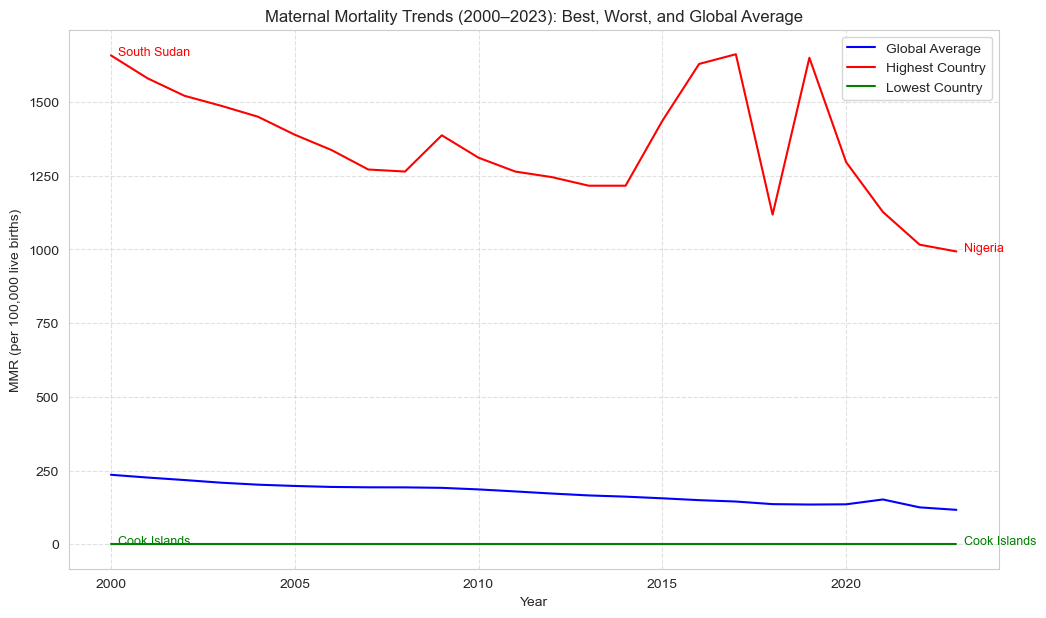

In [96]:
plt.figure(figsize=(12,7))

plt.plot(global_summary["Year"], global_summary["avg"], label="Global Average", color="blue")
plt.plot(global_summary["Year"], global_summary["worst"], label="Highest Country", color="red")
plt.plot(global_summary["Year"], global_summary["best"], label="Lowest Country", color="green")

# Annotate country names at start and end years
for year in [2000, 2023]:
    row = global_summary.loc[global_summary["Year"] == year]
    plt.text(year+0.2, row["worst"], row["worst_country"].values[0], color="red", fontsize=9)
    plt.text(year+0.2, row["best"], row["best_country"].values[0], color="green", fontsize=9)

plt.title("Maternal Mortality Trends (2000–2023): Best, Worst, and Global Average")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

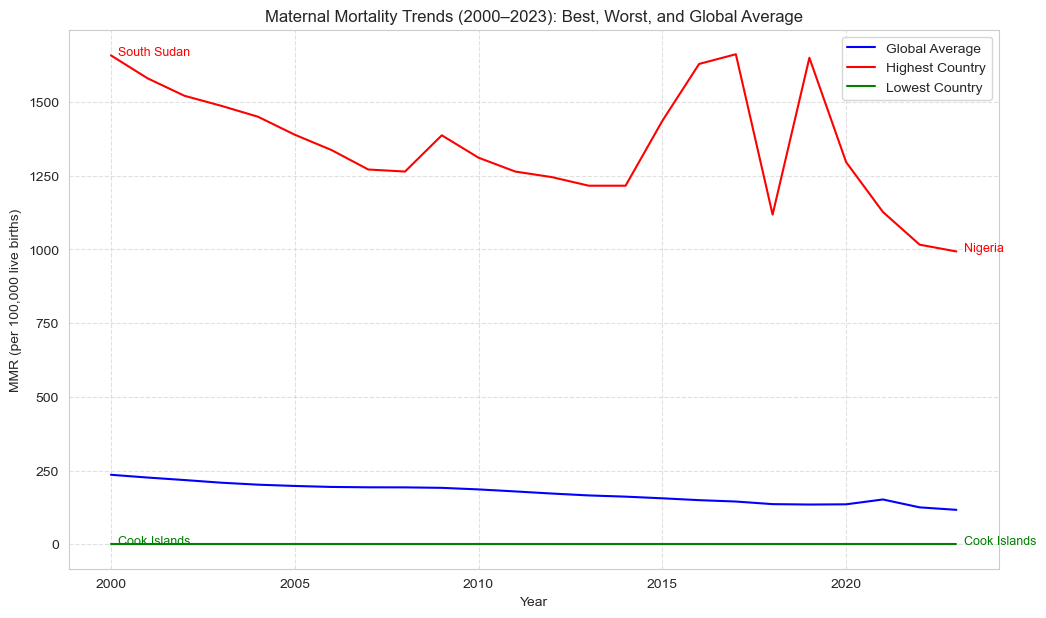

In [97]:
plt.figure(figsize=(12,7))

plt.plot(global_summary["Year"], global_summary["avg"], label="Global Average", color="blue")
plt.plot(global_summary["Year"], global_summary["worst"], label="Highest Country", color="red")
plt.plot(global_summary["Year"], global_summary["best"], label="Lowest Country", color="green")

# Annotate country names at start and end years
for year in [2000, 2023]:
    row = global_summary.loc[global_summary["Year"] == year]
    plt.text(year+0.2, float(row["worst"].iloc[0]), row["worst_country"].values[0], color="red", fontsize=9)
    plt.text(year+0.2, float(row["best"].iloc[0]), row["best_country"].values[0], color="green", fontsize=9)

plt.title("Maternal Mortality Trends (2000–2023): Best, Worst, and Global Average")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
# Focus on regional averages
regional_trends = df_long.groupby(["URR", "Year"])["MMR"].mean().reset_index()

# Container for forecasts
forecast_results = []

for region in regional_trends["URR"].unique():
    subset = regional_trends[regional_trends["URR"] == region]
    
    # Prepare X (year) and y (MMR)
    X = subset["Year"].values.reshape(-1, 1)
    y = subset["MMR"].values
    
    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    
    # Predict for 2030
    mmr_2030 = model.predict([[2030]])[0]
    
    # Store
    forecast_results.append({
        "Region": region,
        "MMR_2023": y[-1],
        "Forecast_2030": mmr_2030,
        "On_Target": mmr_2030 < 70
    })

# Convert to DataFrame
forecast_df = pd.DataFrame(forecast_results)
forecast_df

,Region,MMR_2023,Forecast_2030,On_Target
0,East Asia and Pacific,85.354839,56.010902,True
1,Europe and Central Asia,9.057692,8.231987,True
2,Latin America and Caribbean,71.666667,70.016201,False
3,Middle East and North Africa,30.526316,22.650931,True
4,North America,14.500000,19.870290,True
5,Not Classified,11.000000,25.051304,True
6,South Asia,138.750000,26.423714,True
7,Sub-Saharan Africa,316.959184,247.336903,False


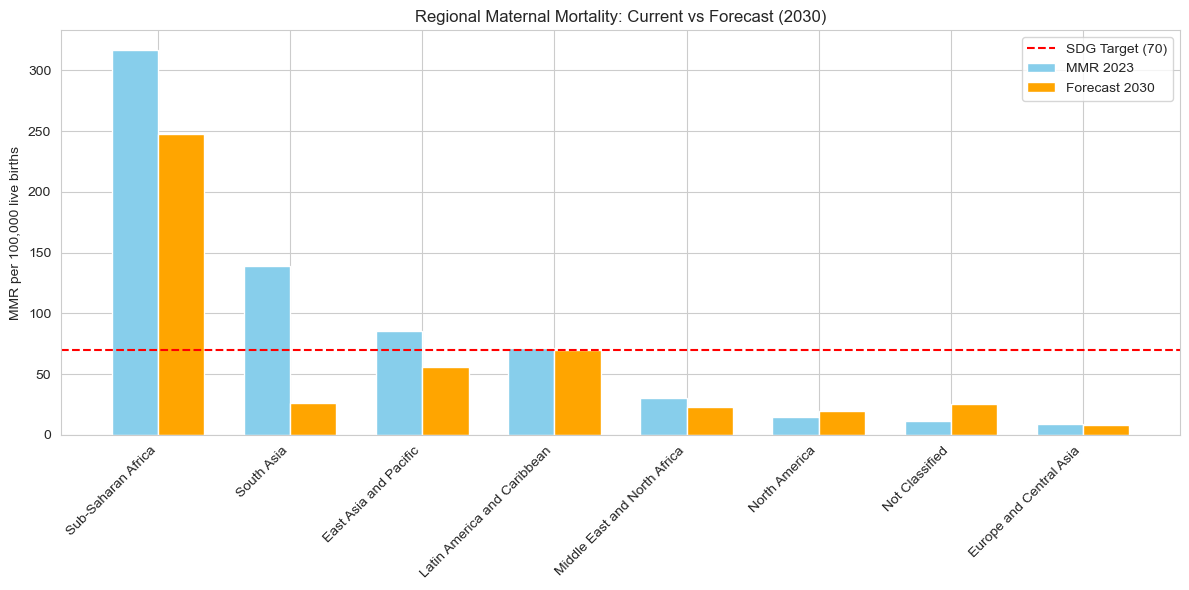

In [100]:
forecast_df_sorted = forecast_df.sort_values('MMR_2023', ascending=False)

plt.figure(figsize=(12,6))

bar_width = 0.35
x = range(len(forecast_df_sorted))

# Bars for 2023
plt.bar(
    [i - bar_width/2 for i in x],
    forecast_df_sorted['MMR_2023'],
    width=bar_width,
    color='skyblue',
    label='MMR 2023'
)

# Bars for 2030 forecast
plt.bar(
    [i + bar_width/2 for i in x],
    forecast_df_sorted['Forecast_2030'],
    width=bar_width,
    color='orange',
    label='Forecast 2030'
)

# SDG target line
plt.axhline(70, color='red', linestyle='--', label='SDG Target (70)')

# Labels
plt.xticks(x, forecast_df_sorted['Region'], rotation=45, ha='right')
plt.ylabel('MMR per 100,000 live births')
plt.title('Regional Maternal Mortality: Current vs Forecast (2030)')
plt.legend()
plt.tight_layout()
plt.show()

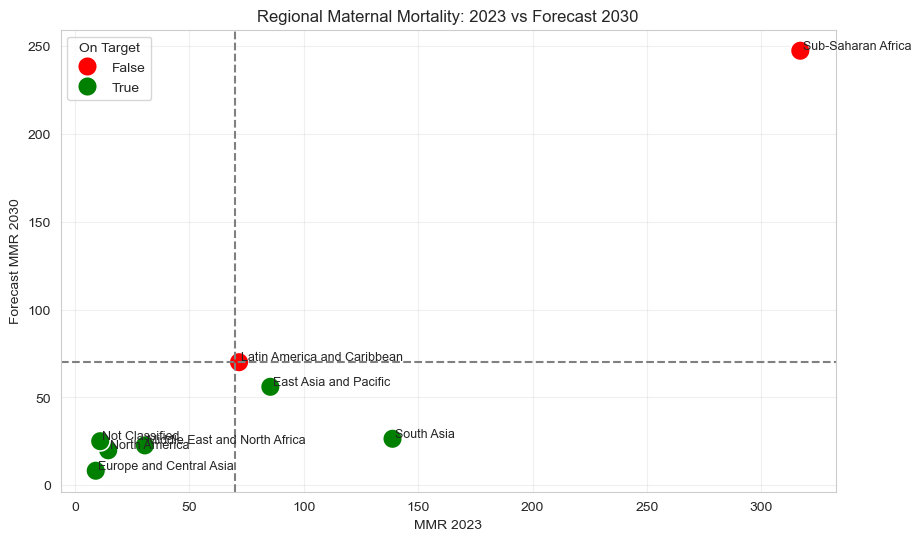

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=forecast_df,
    x='MMR_2023',
    y='Forecast_2030',
    hue='On_Target',
    palette={True: 'green', False: 'red'},
    s=200
)

# SDG lines
plt.axhline(70, color='gray', linestyle='--')
plt.axvline(70, color='gray', linestyle='--')

# Annotate regions
for _, row in forecast_df.iterrows():
    plt.text(row['MMR_2023']+1, row['Forecast_2030']+1, row['Region'], fontsize=9)

plt.xlabel('MMR 2023')
plt.ylabel('Forecast MMR 2030')
plt.title('Regional Maternal Mortality: 2023 vs Forecast 2030')
plt.legend(title='On Target')
plt.grid(alpha=0.3)
plt.show()

In [102]:
country_forecasts = []

for country, group in df_long.groupby("Country"):
    
    # Sort by year 
    group = group.sort_values("Year")
    
    # Year and MMR values
    X = group["Year"].values.reshape(-1, 1)
    y = group["MMR"].values
    
    # Fit model
    model = LinearRegression()
    model.fit(X, y)
    
    # Use 2023 numbers
    mmr_2023 = group.loc[group["Year"] == 2023, "MMR"]
    mmr_2023 = mmr_2023.values[0]
    
    # Predict 2030
    forecast_2030 = model.predict([[2030]])[0]
    
    # SDG target check
    on_target = forecast_2030 < 70
    
    country_forecasts.append({
        "Country": country,
        "MMR_2023": mmr_2023,
        "Forecast_2030": forecast_2030,
        "On_Target": on_target
    })

country_forecasts = pd.DataFrame(country_forecasts)

# View highest projected burden
country_forecasts.sort_values("Forecast_2030", ascending=False).head(15)

,Country,MMR_2023,Forecast_2030,On_Target
124,Nigeria,993,1067.287391,False
33,Chad,748,803.863478,False
32,Central African Republic,692,767.130580,False
96,Liberia,628,669.252899,False
163,South Sudan,692,638.163188,False
18,Benin,518,610.135362,False
95,Lesotho,478,598.718261,False
41,Cote d'Ivoire,359,460.370435,False
46,DR Congo,427,429.920870,False
88,Kenya,379,414.476522,False


In [103]:
country_forecasts["Forecast_2030"] = country_forecasts["Forecast_2030"].clip(lower=0)

In [104]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030")

,Country,MMR_2023,Forecast_2030,On_Target
92,Laos,112,0.000000,True
137,Poland,2,0.000000,True
143,Russia,9,0.000000,True
144,Rwanda,229,0.000000,True
134,Paraguay,58,0.000000,True
...,...,...,...,...
154,Seychelles,42,61.310290,True
43,Cuba,35,61.614058,True
57,Eswatini,118,62.190435,True
147,Saint Vincent and the Grenadines,56,64.834638,True


In [105]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030").head(20)

,Country,MMR_2023,Forecast_2030,On_Target
92,Laos,112,0.0,True
137,Poland,2,0.0,True
143,Russia,9,0.0,True
144,Rwanda,229,0.0,True
134,Paraguay,58,0.0,True
131,Palestine,16,0.0,True
155,Sierra Leone,354,0.0,True
19,Bhutan,47,0.0,True
87,Kazakhstan,10,0.0,True
15,Belarus,1,0.0,True


In [106]:
country_forecasts[country_forecasts["Forecast_2030"] <= 70].sort_values("Forecast_2030").tail(20)

,Country,MMR_2023,Forecast_2030,On_Target
74,Honduras,47,44.290000,True
173,Thailand,34,44.685362,True
24,Brunei Darussalam,36,45.306232,True
53,El Salvador,39,45.447681,True
49,Dominica,36,50.111594,True
68,Grenada,48,50.637826,True
48,Djibouti,162,51.012029,True
150,Sao Tome and Principe,75,51.168116,True
109,Mexico,42,51.345072,True
44,Cyprus,14,51.883043,True


In [107]:
# Top 5 already at zero
top_zero = country_forecasts[country_forecasts["Forecast_2030"] == 0].sort_values("Forecast_2030").head(5)

# Bottom 5 closest to 70
closest_to_target = country_forecasts[country_forecasts["Forecast_2030"] < 70].sort_values("Forecast_2030", ascending=False).head(5)

# Combine for display
summary_table = pd.concat([top_zero, closest_to_target])
summary_table

#The top 5 are countries already predicted to have extremely low MMR by 2030 (essentially zero).
#The bottom 5 are the countries barely on track to meet the SDG target of 70 MMR.

,Country,MMR_2023,Forecast_2030,On_Target
4,Angola,183,0.000000,True
171,Tajikistan,14,0.000000,True
155,Sierra Leone,354,0.000000,True
144,Rwanda,229,0.000000,True
143,Russia,9,0.000000,True
37,Comoros,179,67.918986,True
147,Saint Vincent and the Grenadines,56,64.834638,True
57,Eswatini,118,62.190435,True
43,Cuba,35,61.614058,True
154,Seychelles,42,61.310290,True


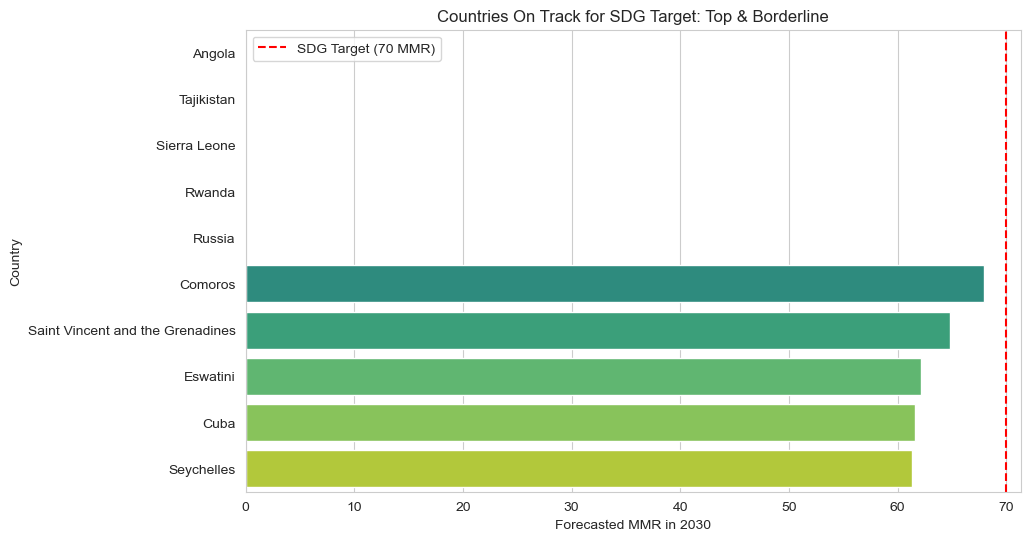

In [108]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=summary_table,
    x="Forecast_2030",
    y="Country",
    hue='Country',
    palette="viridis",
    dodge=False,          # ensures bars aren’t split
    legend=False
    
)
plt.axvline(70, color="red", linestyle="--", label="SDG Target (70 MMR)")
plt.xlabel("Forecasted MMR in 2030")
plt.ylabel("Country")
plt.title("Countries On Track for SDG Target: Top & Borderline")
plt.legend()
plt.show()

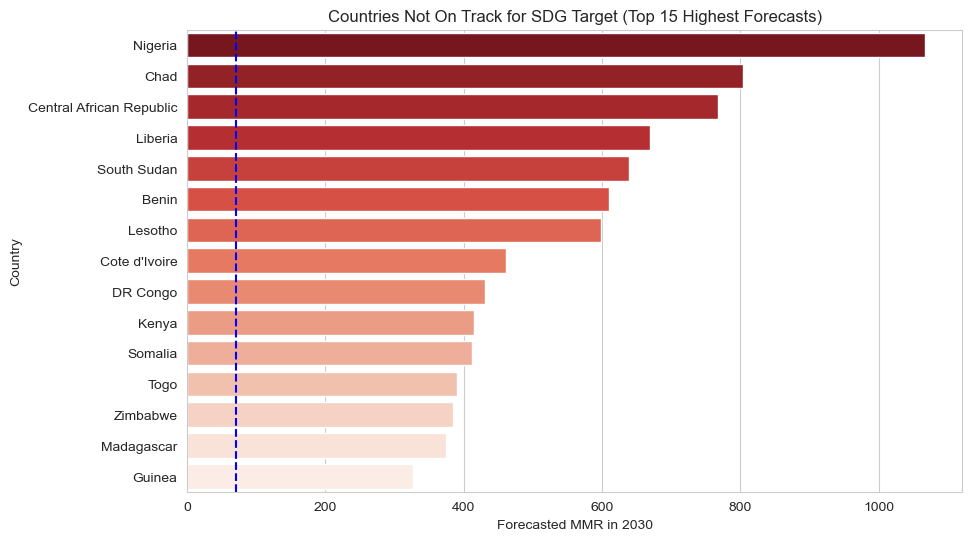

In [109]:
# Filter countries not on track
not_on_track = country_forecasts[country_forecasts["On_Target"] == False]\
    .sort_values("Forecast_2030", ascending=False).head(15)  # top 15 worst-off

plt.figure(figsize=(10,6))
sns.barplot(
    data=not_on_track,
    x="Forecast_2030",
    y="Country",
    hue="Country",       # assign hue for color
    palette="Reds_r",
    dodge=False,
    legend=False
)
plt.axvline(70, color="blue", linestyle="--", label="SDG Target (70 MMR)")
plt.xlabel("Forecasted MMR in 2030")
plt.ylabel("Country")
plt.title("Countries Not On Track for SDG Target (Top 15 Highest Forecasts)")
plt.show()

In [110]:
zero_countries = country_forecasts[country_forecasts["Forecast_2030"] == 0]["Country"]
zero_countries.tolist()

['Angola',
 'Bangladesh',
 'Belarus',
 'Bhutan',
 'Cook Islands',
 'Estonia',
 'Ethiopia',
 'India',
 'Kazakhstan',
 'Laos',
 'Morocco',
 'Mozambique',
 'Netherlands',
 'Norway',
 'Palestine',
 'Paraguay',
 'Poland',
 'Russia',
 'Rwanda',
 'Sierra Leone',
 'Tajikistan',
 'Timor-Leste',
 'Turkmenistan']

In [111]:
global_trend = (
    df_long
    .groupby("Year")["MMR"]
    .mean()
    .reset_index()
)

In [112]:
global_trend

,Year,MMR
0,2000,235.507692
1,2001,226.123077
2,2002,217.666667
3,2003,208.676923
4,2004,201.984615
5,2005,197.620513
6,2006,194.287179
7,2007,193.046154
8,2008,192.805128
9,2009,191.230769


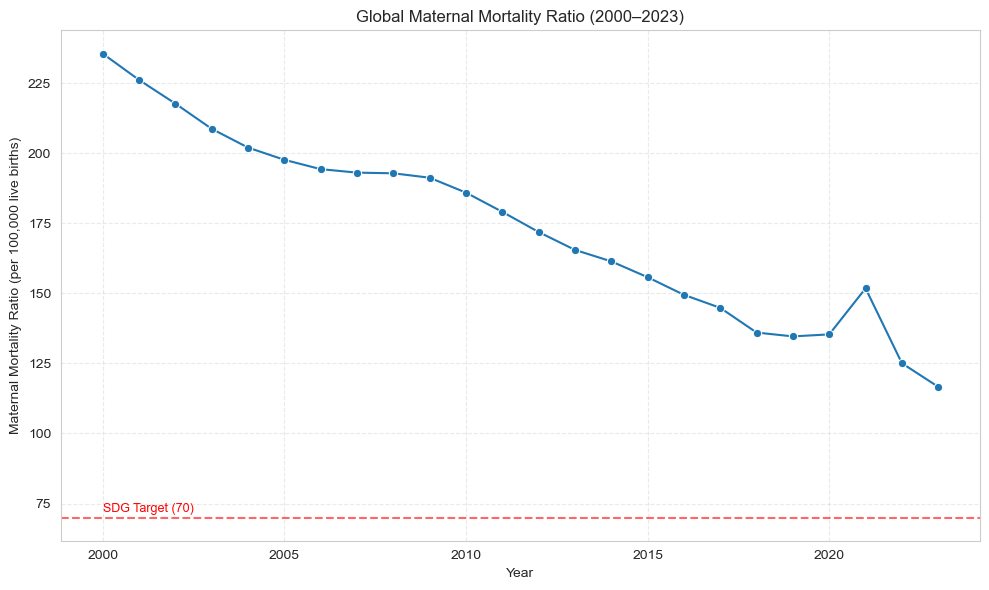

In [113]:
plt.figure(figsize=(10,6))

sns.lineplot(
    data=global_trend,
    x="Year",
    y="MMR",
    marker="o"
)

plt.title("Global Maternal Mortality Ratio (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Maternal Mortality Ratio (per 100,000 live births)")

# Optional: mark SDG target
plt.axhline(70, color="red", linestyle="--", alpha=0.6)
plt.text(2000, 72, "SDG Target (70)", color="red", fontsize=9)

plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

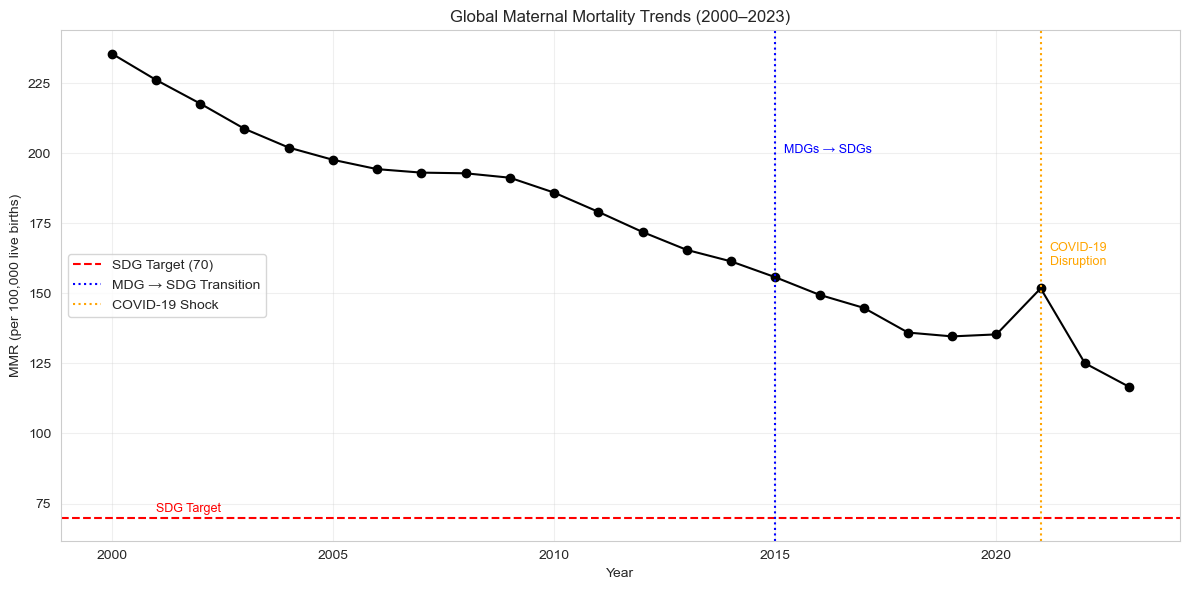

In [114]:
plt.figure(figsize=(12,6))

plt.plot(global_trend["Year"], global_trend["MMR"], marker="o", color="black")

# Key reference lines
plt.axhline(70, color="red", linestyle="--", label="SDG Target (70)")
plt.axvline(2015, color="blue", linestyle=":", label="MDG → SDG Transition")
plt.axvline(2021, color="orange", linestyle=":", label="COVID-19 Shock")

# Annotations
plt.text(2015.2, 200, "MDGs → SDGs", color="blue", fontsize=9)
plt.text(2021.2, 160, "COVID-19\nDisruption", color="orange", fontsize=9)
plt.text(2001, 72, "SDG Target", color="red", fontsize=9)

plt.title("Global Maternal Mortality Trends (2000–2023)")
plt.xlabel("Year")
plt.ylabel("MMR (per 100,000 live births)")
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()